In [7]:
def process_chapter_md(text: str) -> str:
    text_arr = text.split(".\n\n~")
    for idx,txt in enumerate(text_arr):
        try:
            header,filler = txt.split("Permalink\n\n")
        except Exception as e:
            print(e, txt)
        header = f"## {header}"
        filler = f"{filler}."
        new_txt = f"{header}\n\n{filler}"
        text_arr[idx] = new_txt
    return "\n".join(text_arr)

# Chapter 1

## 00. Reversed String

Obtain the string that arranges letters of the string “stressed” in reverse order (tail to head).

In [1]:
str = "stressed"
print(str[::-1])

desserts


## 01. "schooled"

Obtain the string that concatenates the 1st, 3rd, 5th, and 7th letters in the string "schooled".

In [2]:
str = "schooled"
print(str[::2])

shoe


## 02. "shoe" + "cold" = "schooled"

Obtain the string "schooled" by concatenating the letters in "shoe" and "cold" one after the other from head to tail.

In [3]:
str1 = "shoe"
str2 = "cold"
str3 = ""
for i in range(len(str1)):
    str3+= str1[i]+str2[i]
print(str3)

schooled


## 03. Pi

Split the sentence "Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics". into words, and create a list whose element presents the number of alphabetical letters in the corresponding word.

In [5]:
str = "Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics"
list_text = [clean_word for word in str.split(" ") for clean_word in word.split(",") if len(clean_word)]
list_len = [len(word) for word in list_text]
print(list_text)
print(list_len)

['Now', 'I', 'need', 'a', 'drink', 'alcoholic', 'of', 'course', 'after', 'the', 'heavy', 'lectures', 'involving', 'quantum', 'mechanics']
[3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9]


In [8]:
import math
print(math.pi)

3.141592653589793


## 04. Atomic symbols

Split the sentence "Hi He Lied Because Boron Could Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arthur King Can". into words, and extract the first letter from the 1st, 5th, 6th, 7th, 8th, 9th, 15th, 16th, 19th words and the first two letters from the other words. Create an associative array (dictionary object or mapping object) that maps from the extracted string to the position (offset in the sentence) of the corresponding word.

In [7]:
str = "Hi He Lied Because Boron Could Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arthur King Can"
first_letter_pos = [1,5,6,7,8,9,15,16,19]
list_str = str.split(" ")
mapper = {word[0] if idx+1 in first_letter_pos else word[:2]:idx+1 for idx,word in enumerate(list_str)}
print(mapper)

{'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mi': 12, 'Al': 13, 'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 'Ca': 20}


## 05. n-gram

Implement a function that obtains n-grams from a given sequence object (e.g., string and list). Use this function to obtain word bi-grams and letter bi-grams from the sentence "I am an NLPer"

In [19]:
str = "I am an NLPer"
def word_ngrams(text,n=2):
    list_word = text.split(" ")
    word_ngram = [" ".join(list_word[i-n:i]) for i in range(n,len(list_word)+1)]
    return word_ngram
def letter_ngrams(text,n=2):
    list_letter = [letter for letter in text if letter.isalpha()]
    letter_ngram = ["".join(list_letter[i-n:i]) for i in range(n,len(list_letter)+1)]
    return letter_ngram
print(word_ngrams(str))
print(letter_ngrams(str))

['I am', 'am an', 'an NLPer']
['Ia', 'am', 'ma', 'an', 'nN', 'NL', 'LP', 'Pe', 'er']


## 06. Set

Let the sets of letter bi-grams from the words "paraparaparadise" and "paragraph" $X$ and $Y$, respectively. Obtain the union, intersection, difference of the two sets. In addition, check whether the bigram "se" is included in the sets $X$ and $Y$

In [24]:
str1 = "paraparaparadise"
str2 = "paragraph"
str1_ngram = letter_ngrams(str1)
str2_ngram = letter_ngrams(str2)
union_set = list(set(str1_ngram) | set(str2_ngram))
intersection_set = list(set(str1_ngram) & set(str2_ngram))
difference_set = list(set(str1_ngram) - set(str2_ngram))
print("Union: ",union_set,f" Bigram 'se' exist: {'Yes' if 'se' in union_set else 'No'}")
print("Intersection: ",intersection_set,f" Bigram 'se' exist: {'Yes' if 'se' in intersection_set else 'No'}")
print("Difference: ",difference_set,f" Bigram 'se' exist: {'Yes' if 'se' in difference_set else 'No'}")

Union:  ['di', 'gr', 'ar', 'ag', 'ph', 'ra', 'se', 'ap', 'pa', 'ad', 'is']  Bigram 'se' exist: Yes
Intersection:  ['ap', 'ra', 'ar', 'pa']  Bigram 'se' exist: No
Difference:  ['di', 'is', 'se', 'ad']  Bigram 'se' exist: Yes


## 07. Template-based sentence generation

Implement a function that receives arguments, x, y, and z and returns a string "{y} is {z} at {x}", where "{x}", "{y}", and "{z}" denote the values of x, y, and z, respectively. In addition, confirm the return string by giving the arguments x=12, y="temperature", and z=22.4.

In [25]:
def template_based(x,y,z):
    return f"{y} is {z} at {x}"
x = 12
y = "temperature"
z = 22.4
print(template_based(x,y,z))

temperature is 22.4 at 12


## 08. cipher text

Implement a function cipher that converts a given string with the specification:

- Every alphabetical lowercase letter c is converted to a letter whose ASCII code is (219 - [the ASCII code of c])
- Keep other letters unchanged

Use this function to cipher and decipher an English message.

In [29]:
def cipher(text):
    # cipher
    list_letter = [letter for letter in text]
    if 'c' in list_letter:
        text = "".join([x if x!='c' else chr(219-ord('c')) for x in list_letter])
    else:
        text = "".join([x if x!=chr(219-ord('c')) else 'c'  for x in list_letter])
    return text
str = "Canada is a country with a lot of cinder and cocktails"
print(cipher(str))

Canada is a xountry with a lot of xinder and xoxktails


## 09. Typoglycemia

Write a program with the specification:

- Receive a word sequence separated by space
- For each word in the sequence:
    - If the word is no longer than four letters, keep the word unchanged
    - Otherwise,
        - Keep the first and last letters unchanged
        - Shuffle other letters in other positions (in the middle of the word)

Observe the result by giving a sentence, e.g., "I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind ".

In [56]:
import random
str = "I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind"
def typoglycemia(text):
    list_word = text.split(" ")
    res = []
    for word in list_word:
        if len(word) <= 4:
            res.append(word)
        else: 
            temp_str = list(word[1:-1])
            random.shuffle(temp_str)
            temp_str = "".join(temp_str)
            final_str = word[0]+temp_str+word[-1]
            res.append(final_str)
    return " ".join(res)
print(typoglycemia(str))

I c'unodlt bleviee that I cuold alultcay untsandred what I was rieandg : the pmenoanehl pweor of the hmuan mind


# Chapter 2

The file popular-names.txt stores names of babies born in US with their genders, numbers of births, and years of births in tab-separated format. Create a program with the specifications below. Run the program with popular-names.txt as an input. Furthermore, confirm that the same (similar) result can be obtained by running a UNIX command.

In [3]:
with open("nlp-hundred-misc/popular-names.txt") as f:
    text = f.read()
print(text)

Mary	F	7065	1880
Anna	F	2604	1880
Emma	F	2003	1880
Elizabeth	F	1939	1880
Minnie	F	1746	1880
Margaret	F	1578	1880
Ida	F	1472	1880
Alice	F	1414	1880
Bertha	F	1320	1880
Sarah	F	1288	1880
John	M	9655	1880
William	M	9532	1880
James	M	5927	1880
Charles	M	5348	1880
George	M	5126	1880
Frank	M	3242	1880
Joseph	M	2632	1880
Thomas	M	2534	1880
Henry	M	2444	1880
Robert	M	2415	1880
Mary	F	6919	1881
Anna	F	2698	1881
Emma	F	2034	1881
Elizabeth	F	1852	1881
Margaret	F	1658	1881
Minnie	F	1653	1881
Ida	F	1439	1881
Annie	F	1326	1881
Bertha	F	1324	1881
Alice	F	1308	1881
John	M	8769	1881
William	M	8524	1881
James	M	5441	1881
George	M	4664	1881
Charles	M	4636	1881
Frank	M	2834	1881
Joseph	M	2456	1881
Henry	M	2339	1881
Thomas	M	2282	1881
Edward	M	2177	1881
Mary	F	8148	1882
Anna	F	3143	1882
Emma	F	2303	1882
Elizabeth	F	2186	1882
Minnie	F	2004	1882
Margaret	F	1821	1882
Ida	F	1673	1882
Alice	F	1542	1882
Bertha	F	1508	1882
Annie	F	1492	1882
John	M	9557	1882
William	M	9298	1882
James	M	5892	1882
George	M	5193	1882


## 10. Line Count

Count the number of lines of the file. Confirm the result by using wc command.

In [3]:
with open("nlp-hundred-misc/popular-names.txt") as f:
    line_count = len(f.readlines())
print(line_count)

2780


In [16]:
!wc nlp-hundred-misc/popular-names.txt

 2780 11120 55026 nlp-hundred-misc/popular-names.txt


## 11. Replace tabs into spaces

Replace every occurrence of a tab character into a space. Confirm the result by using sed, tr, or expand command.

In [11]:
print(text.replace("\t"," "))

Mary F 7065 1880
Anna F 2604 1880
Emma F 2003 1880
Elizabeth F 1939 1880
Minnie F 1746 1880
Margaret F 1578 1880
Ida F 1472 1880
Alice F 1414 1880
Bertha F 1320 1880
Sarah F 1288 1880
John M 9655 1880
William M 9532 1880
James M 5927 1880
Charles M 5348 1880
George M 5126 1880
Frank M 3242 1880
Joseph M 2632 1880
Thomas M 2534 1880
Henry M 2444 1880
Robert M 2415 1880
Mary F 6919 1881
Anna F 2698 1881
Emma F 2034 1881
Elizabeth F 1852 1881
Margaret F 1658 1881
Minnie F 1653 1881
Ida F 1439 1881
Annie F 1326 1881
Bertha F 1324 1881
Alice F 1308 1881
John M 8769 1881
William M 8524 1881
James M 5441 1881
George M 4664 1881
Charles M 4636 1881
Frank M 2834 1881
Joseph M 2456 1881
Henry M 2339 1881
Thomas M 2282 1881
Edward M 2177 1881
Mary F 8148 1882
Anna F 3143 1882
Emma F 2303 1882
Elizabeth F 2186 1882
Minnie F 2004 1882
Margaret F 1821 1882
Ida F 1673 1882
Alice F 1542 1882
Bertha F 1508 1882
Annie F 1492 1882
John M 9557 1882
William M 9298 1882
James M 5892 1882
George M 5193 1882


In [14]:
!sed 's/\t/ /g' nlp-hundred-misc/popular-names.txt

Mary F 7065 1880
Anna F 2604 1880
Emma F 2003 1880
Elizabeth F 1939 1880
Minnie F 1746 1880
Margaret F 1578 1880
Ida F 1472 1880
Alice F 1414 1880
Bertha F 1320 1880
Sarah F 1288 1880
John M 9655 1880
William M 9532 1880
James M 5927 1880
Charles M 5348 1880
George M 5126 1880
Frank M 3242 1880
Joseph M 2632 1880
Thomas M 2534 1880
Henry M 2444 1880
Robert M 2415 1880
Mary F 6919 1881
Anna F 2698 1881
Emma F 2034 1881
Elizabeth F 1852 1881
Margaret F 1658 1881
Minnie F 1653 1881
Ida F 1439 1881
Annie F 1326 1881
Bertha F 1324 1881
Alice F 1308 1881
John M 8769 1881
William M 8524 1881
James M 5441 1881
George M 4664 1881
Charles M 4636 1881
Frank M 2834 1881
Joseph M 2456 1881
Henry M 2339 1881
Thomas M 2282 1881
Edward M 2177 1881
Mary F 8148 1882
Anna F 3143 1882
Emma F 2303 1882
Elizabeth F 2186 1882
Minnie F 2004 1882
Margaret F 1821 1882
Ida F 1673 1882
Alice F 1542 1882
Bertha F 1508 1882
Annie F 1492 1882
John M 9557 1882
William M 9298 1882
James M 5892 1882
George M 5193 1882


## 12. col1.txt from the first column, col2.txt from the second column

Extract the value of the first column of each line, and store the output into col1.txt. Extract the value of the second column of each line, and store the output into col2.txt. Confirm the result by using cut command.

In [23]:
with open("nlp-hundred-misc/popular-names.txt") as f:
    rows = f.readlines()
col1,col2 = [],[]
for st in rows:
    temp_ar = st.split("\t")
    col1.append(temp_ar[0])
    col2.append(temp_ar[1])
with open("nlp-hundred-misc/col1-py.txt", "w") as f:
    f.write("\n".join(col1))
with open("nlp-hundred-misc/col2-py.txt", "w") as f:
    f.write("\n".join(col2))

In [30]:
!cut -f 1 nlp-hundred-misc/popular-names.txt >> nlp-hundred-misc/col1-unix.txt
!cut -f 2 nlp-hundred-misc/popular-names.txt >> nlp-hundred-misc/col2-unix.txt

## 13. Merging col1.txt and col2.txt

Join the contents of col1.txt and col2.txt, and create a text file whose each line contains the values of the first and second columns (separated by tab character) of the original file. Confirm the result by using paste command.

In [28]:
with open("nlp-hundred-misc/col1-py.txt",'r') as f:
    rows1 = f.readlines()
with open("nlp-hundred-misc/col2-py.txt",'r') as f:
    rows2 = f.readlines()
rows3 = [f"{rows1[i].strip()}\t{rows2[i].strip()}" for i in range(len(rows1))]
with open("nlp-hundred-misc/col12-py.txt", "w") as f:
    f.write("\n".join(rows3))

In [33]:
!paste nlp-hundred-misc/col1-unix.txt nlp-hundred-misc/col2-unix.txt >> nlp-hundred-misc/col12-unix.txt

## 14. First N lines

Receive a natural number $N$ from a command-line argument, and output the first $N$ lines of the file. Confirm the result by using head command.

In [36]:
!echo $(( $RANDOM % 2780 + 1 ))

161


In [45]:
n_rand = 161
print("".join([x for x in rows[:n_rand]]))

Mary	F	7065	1880
Anna	F	2604	1880
Emma	F	2003	1880
Elizabeth	F	1939	1880
Minnie	F	1746	1880
Margaret	F	1578	1880
Ida	F	1472	1880
Alice	F	1414	1880
Bertha	F	1320	1880
Sarah	F	1288	1880
John	M	9655	1880
William	M	9532	1880
James	M	5927	1880
Charles	M	5348	1880
George	M	5126	1880
Frank	M	3242	1880
Joseph	M	2632	1880
Thomas	M	2534	1880
Henry	M	2444	1880
Robert	M	2415	1880
Mary	F	6919	1881
Anna	F	2698	1881
Emma	F	2034	1881
Elizabeth	F	1852	1881
Margaret	F	1658	1881
Minnie	F	1653	1881
Ida	F	1439	1881
Annie	F	1326	1881
Bertha	F	1324	1881
Alice	F	1308	1881
John	M	8769	1881
William	M	8524	1881
James	M	5441	1881
George	M	4664	1881
Charles	M	4636	1881
Frank	M	2834	1881
Joseph	M	2456	1881
Henry	M	2339	1881
Thomas	M	2282	1881
Edward	M	2177	1881
Mary	F	8148	1882
Anna	F	3143	1882
Emma	F	2303	1882
Elizabeth	F	2186	1882
Minnie	F	2004	1882
Margaret	F	1821	1882
Ida	F	1673	1882
Alice	F	1542	1882
Bertha	F	1508	1882
Annie	F	1492	1882
John	M	9557	1882
William	M	9298	1882
James	M	5892	1882
George	M	5193	1882


In [46]:
!head nlp-hundred-misc/popular-names.txt -n 161

Mary	F	7065	1880
Anna	F	2604	1880
Emma	F	2003	1880
Elizabeth	F	1939	1880
Minnie	F	1746	1880
Margaret	F	1578	1880
Ida	F	1472	1880
Alice	F	1414	1880
Bertha	F	1320	1880
Sarah	F	1288	1880
John	M	9655	1880
William	M	9532	1880
James	M	5927	1880
Charles	M	5348	1880
George	M	5126	1880
Frank	M	3242	1880
Joseph	M	2632	1880
Thomas	M	2534	1880
Henry	M	2444	1880
Robert	M	2415	1880
Mary	F	6919	1881
Anna	F	2698	1881
Emma	F	2034	1881
Elizabeth	F	1852	1881
Margaret	F	1658	1881
Minnie	F	1653	1881
Ida	F	1439	1881
Annie	F	1326	1881
Bertha	F	1324	1881
Alice	F	1308	1881
John	M	8769	1881
William	M	8524	1881
James	M	5441	1881
George	M	4664	1881
Charles	M	4636	1881
Frank	M	2834	1881
Joseph	M	2456	1881
Henry	M	2339	1881
Thomas	M	2282	1881
Edward	M	2177	1881
Mary	F	8148	1882
Anna	F	3143	1882
Emma	F	2303	1882
Elizabeth	F	2186	1882
Minnie	F	2004	1882
Margaret	F	1821	1882
Ida	F	1673	1882
Alice	F	1542	1882
Bertha	F	1508	1882
Annie	F	1492	1882
John	M	9557	1882
William	M	9298	1882
James	M	5892	1882
George	M	5193	1882


## 15. Last N lines

Receive a natural number $N$ from a command-line argument, and output the last $N$ lines of the file. Confirm the result by using tail command.

In [103]:
!echo $(( $RANDOM % 2780 + 1 ))

329


In [104]:
n_rand = 329
print("".join([x for x in rows[-n_rand:]]))

Michael	M	28245	2002
Joshua	M	25993	2002
Matthew	M	25153	2002
Ethan	M	22109	2002
Andrew	M	22019	2002
Joseph	M	21895	2002
Christopher	M	21684	2002
Nicholas	M	21390	2002
Daniel	M	21316	2002
Emily	F	25691	2003
Emma	F	22706	2003
Madison	F	20199	2003
Hannah	F	17637	2003
Olivia	F	16148	2003
Abigail	F	15928	2003
Alexis	F	14867	2003
Ashley	F	14514	2003
Elizabeth	F	14103	2003
Samantha	F	13867	2003
Jacob	M	29638	2003
Michael	M	27121	2003
Joshua	M	25095	2003
Matthew	M	24001	2003
Andrew	M	22153	2003
Joseph	M	21367	2003
Ethan	M	21357	2003
Daniel	M	21039	2003
Christopher	M	20749	2003
Anthony	M	20145	2003
Emily	F	25037	2004
Emma	F	21607	2004
Madison	F	20622	2004
Olivia	F	16105	2004
Hannah	F	15605	2004
Abigail	F	15426	2004
Isabella	F	15017	2004
Ashley	F	14373	2004
Samantha	F	13783	2004
Elizabeth	F	13561	2004
Jacob	M	27881	2004
Michael	M	25458	2004
Joshua	M	24204	2004
Matthew	M	22874	2004
Ethan	M	22206	2004
Andrew	M	21703	2004
Daniel	M	20983	2004
William	M	20225	2004
Joseph	M	20125	2004
Christopher	M	1

In [105]:
!tail nlp-hundred-misc/popular-names.txt -n 329

Michael	M	28245	2002
Joshua	M	25993	2002
Matthew	M	25153	2002
Ethan	M	22109	2002
Andrew	M	22019	2002
Joseph	M	21895	2002
Christopher	M	21684	2002
Nicholas	M	21390	2002
Daniel	M	21316	2002
Emily	F	25691	2003
Emma	F	22706	2003
Madison	F	20199	2003
Hannah	F	17637	2003
Olivia	F	16148	2003
Abigail	F	15928	2003
Alexis	F	14867	2003
Ashley	F	14514	2003
Elizabeth	F	14103	2003
Samantha	F	13867	2003
Jacob	M	29638	2003
Michael	M	27121	2003
Joshua	M	25095	2003
Matthew	M	24001	2003
Andrew	M	22153	2003
Joseph	M	21367	2003
Ethan	M	21357	2003
Daniel	M	21039	2003
Christopher	M	20749	2003
Anthony	M	20145	2003
Emily	F	25037	2004
Emma	F	21607	2004
Madison	F	20622	2004
Olivia	F	16105	2004
Hannah	F	15605	2004
Abigail	F	15426	2004
Isabella	F	15017	2004
Ashley	F	14373	2004
Samantha	F	13783	2004
Elizabeth	F	13561	2004
Jacob	M	27881	2004
Michael	M	25458	2004
Joshua	M	24204	2004
Matthew	M	22874	2004
Ethan	M	22206	2004
Andrew	M	21703	2004
Daniel	M	20983	2004
William	M	20225	2004
Joseph	M	20125	2004
Christopher	M	1

## 16. Split a file into N pieces

Receive a natural number $N$ from a command-line argument, and split the input file into $N$ pieces at line boundaries. Confirm the result by using split command.

In [1]:
!echo $(( $RANDOM % 2780 + 1 ))

89


In [22]:
n_rand = 89
with open("nlp-hundred-misc/popular-names.txt") as f:
    rows = f.readlines()
counter = 0
suffix = ['a','a']
for file in range(0,len(rows),int(len(rows)/n_rand)):
    end = int(len(rows)/n_rand)
    if int(counter/26) == (ord(suffix[0])-ord('a')):
        suffix[-1] = chr(ord('a')+(counter%26))
    else:
        suffix[0] = chr(ord('a')+int(counter/26))
        suffix[-1] = 'a'
    suf_text = "".join(suffix)
    counter+=1
    if file+end == len(rows)-(len(rows)%end):
        with open(f'nlp-hundred-misc/py{suf_text}','w') as f:
            f.write("".join(rows[file:len(rows)-1]))
        break
    else:
        with open(f'nlp-hundred-misc/py{suf_text}','w') as f:
            f.write("".join(rows[file:file+end]))

In [5]:
!split -n 89 nlp-hundred-misc/popular-names.txt nlp-hundred-misc/bash

## 17. Distinct strings in the first column

Find distinct strings (a set of strings) of the first column of the file. Confirm the result by using cut, sort, and uniq commands.

In [27]:
set(col1)

{'Abigail',
 'Aiden',
 'Alexander',
 'Alexis',
 'Alice',
 'Amanda',
 'Amelia',
 'Amy',
 'Andrew',
 'Angela',
 'Anna',
 'Annie',
 'Anthony',
 'Ashley',
 'Austin',
 'Ava',
 'Barbara',
 'Benjamin',
 'Bertha',
 'Bessie',
 'Betty',
 'Brandon',
 'Brian',
 'Brittany',
 'Carol',
 'Carolyn',
 'Charles',
 'Charlotte',
 'Chloe',
 'Christopher',
 'Clara',
 'Crystal',
 'Cynthia',
 'Daniel',
 'David',
 'Deborah',
 'Debra',
 'Donald',
 'Donna',
 'Doris',
 'Dorothy',
 'Edward',
 'Elijah',
 'Elizabeth',
 'Emily',
 'Emma',
 'Ethan',
 'Ethel',
 'Evelyn',
 'Florence',
 'Frances',
 'Frank',
 'Gary',
 'George',
 'Hannah',
 'Harper',
 'Harry',
 'Heather',
 'Helen',
 'Henry',
 'Ida',
 'Isabella',
 'Jacob',
 'James',
 'Jason',
 'Jayden',
 'Jeffrey',
 'Jennifer',
 'Jessica',
 'Joan',
 'John',
 'Joseph',
 'Joshua',
 'Judith',
 'Julie',
 'Justin',
 'Karen',
 'Kathleen',
 'Kelly',
 'Kimberly',
 'Larry',
 'Laura',
 'Lauren',
 'Liam',
 'Lillian',
 'Linda',
 'Lisa',
 'Logan',
 'Lori',
 'Lucas',
 'Madison',
 'Margaret

In [30]:
!cut -f 1 nlp-hundred-misc/popular-names.txt | sort | uniq

Abigail
Aiden
Alexander
Alexis
Alice
Amanda
Amelia
Amy
Andrew
Angela
Anna
Annie
Anthony
Ashley
Austin
Ava
Barbara
Benjamin
Bertha
Bessie
Betty
Brandon
Brian
Brittany
Carol
Carolyn
Charles
Charlotte
Chloe
Christopher
Clara
Crystal
Cynthia
Daniel
David
Deborah
Debra
Donald
Donna
Doris
Dorothy
Edward
Elijah
Elizabeth
Emily
Emma
Ethan
Ethel
Evelyn
Florence
Frances
Frank
Gary
George
Hannah
Harper
Harry
Heather
Helen
Henry
Ida
Isabella
Jacob
James
Jason
Jayden
Jeffrey
Jennifer
Jessica
Joan
John
Joseph
Joshua
Judith
Julie
Justin
Karen
Kathleen
Kelly
Kimberly
Larry
Laura
Lauren
Liam
Lillian
Linda
Lisa
Logan
Lori
Lucas
Madison
Margaret
Marie
Mark
Mary
Mason
Matthew
Megan
Melissa
Mia
Michael
Michelle
Mildred
Minnie
Nancy
Nicholas
Nicole
Noah
Oliver
Olivia
Pamela
Patricia
Rachel
Rebecca
Richard
Robert
Ronald
Ruth
Samantha
Sandra
Sarah
Scott
Sharon
Shirley
Sophia
Stephanie
Steven
Susan
Tammy
Taylor
Thomas
Tracy
Tyler
Virginia
Walter
William


## 18. Sort lines in descending order of the third column

Sort the lines in descending numeric order of the third column (sort lines without changing the content of each line). Confirm the result by using sort command.

In [41]:
def argsort(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)
with open("nlp-hundred-misc/popular-names.txt") as f:
    rows = f.readlines()
col3 = []
for st in rows:
    temp_ar = st.split("\t")
    col3.append(temp_ar[2])
print("".join([rows[i] for i in argsort(col3)[::-1]]))

Linda	F	99689	1947
James	M	9951	1911
Mildred	F	9921	1913
Mary	F	9889	1886
Mary	F	9888	1887
John	M	9829	1900
Elizabeth	F	9708	2012
Anna	F	9687	1913
Frances	F	9677	1914
John	M	9655	1880
Linda	F	96211	1948
John	M	9591	1909
John	M	9557	1882
William	M	9532	1880
Elizabeth	F	9505	1913
James	M	94757	1947
Edward	M	9474	1913
Elizabeth	F	9454	2013
John	M	9388	1884
John	M	9342	1908
William	M	9298	1882
Margaret	F	9279	1911
Michael	M	92704	1957
Helen	F	9250	1909
John	M	9247	1888
Frank	M	9237	1913
Mary	F	9217	1884
James	M	9195	1910
Robert	M	91640	1947
Mary	F	9128	1885
Linda	F	91016	1949
Michael	M	90656	1956
Michael	M	90517	1958
John	M	9039	1892
John	M	9026	1886
John	M	8983	1907
Walter	M	8962	1914
William	M	8897	1884
John	M	8894	1883
Dorothy	F	8869	1911
James	M	88584	1948
Michael	M	88528	1954
William	M	8844	1910
Michael	M	88327	1955
John	M	88319	1947
Marie	F	8829	1914
John	M	8769	1881
Mildred	F	8764	1912
John	M	8756	1885
James	M	87436	1946
James	M	87261	1951
James	M	87063	1952
William	M	8705	1888
Mich

In [40]:
!sort nlp-hundred-misc/popular-names.txt -k 3 -r

Linda	F	99689	1947
James	M	9951	1911
Mildred	F	9921	1913
Mary	F	9889	1886
Mary	F	9888	1887
John	M	9829	1900
Elizabeth	F	9708	2012
Anna	F	9687	1913
Frances	F	9677	1914
John	M	9655	1880
Linda	F	96211	1948
John	M	9591	1909
John	M	9557	1882
William	M	9532	1880
Elizabeth	F	9505	1913
James	M	94757	1947
Edward	M	9474	1913
Elizabeth	F	9454	2013
John	M	9388	1884
John	M	9342	1908
William	M	9298	1882
Margaret	F	9279	1911
Michael	M	92704	1957
Helen	F	9250	1909
John	M	9247	1888
Frank	M	9237	1913
Mary	F	9217	1884
James	M	9195	1910
Robert	M	91640	1947
Mary	F	9128	1885
Linda	F	91016	1949
Michael	M	90656	1956
Michael	M	90517	1958
John	M	9039	1892
John	M	9026	1886
John	M	8983	1907
Walter	M	8962	1914
William	M	8897	1884
John	M	8894	1883
Dorothy	F	8869	1911
James	M	88584	1948
Michael	M	88528	1954
William	M	8844	1910
Michael	M	88327	1955
John	M	88319	1947
Marie	F	8829	1914
John	M	8769	1881
Mildred	F	8764	1912
John	M	8756	1885
James	M	87436	1946
James	M	87261	1951
James	M	87063	1952
William	M	8705	1888
Mich

## 19. Frequency of a string in the first column in descending order

Find the frequency of a string in the first column, and sort the strings by descending order of their frequencies. Confirm the result by using cut, uniq, and sort commands.

In [63]:
from collections import Counter
col1_dict = Counter(col1)
sorted_col1 = dict(sorted(col1_dict.items(), key=lambda item: item[1], reverse=True))
print("\n".join([f"{c} {name}" for name,c in sorted_col1.items()]))

118 James
111 William
108 John
108 Robert
92 Mary
75 Charles
74 Michael
73 Elizabeth
70 Joseph
60 Margaret
58 George
58 Thomas
57 David
51 Richard
45 Helen
43 Frank
43 Christopher
41 Anna
40 Edward
39 Ruth
38 Patricia
37 Matthew
36 Dorothy
35 Emma
32 Barbara
31 Daniel
31 Joshua
26 Sarah
26 Linda
26 Jennifer
26 Emily
25 Jessica
25 Jacob
24 Mildred
24 Betty
24 Susan
23 Henry
23 Ashley
22 Nancy
21 Andrew
20 Florence
20 Marie
20 Donald
20 Amanda
19 Samantha
18 Karen
18 Lisa
18 Melissa
18 Madison
18 Olivia
17 Stephanie
17 Abigail
16 Ethel
16 Sandra
16 Mark
15 Frances
15 Carol
15 Angela
15 Michelle
15 Heather
15 Ethan
15 Isabella
14 Shirley
14 Kimberly
14 Amy
14 Ava
13 Virginia
13 Deborah
13 Brian
13 Jason
13 Nicole
13 Hannah
13 Sophia
12 Minnie
12 Bertha
12 Donna
11 Cynthia
10 Alice
10 Doris
10 Ronald
10 Brittany
10 Nicholas
10 Mia
10 Noah
9 Joan
9 Debra
9 Tyler
8 Ida
8 Clara
8 Judith
8 Taylor
8 Alexis
8 Alexander
8 Mason
7 Harry
7 Sharon
7 Steven
7 Tammy
7 Brandon
7 Liam
6 Anthony
5 Annie


In [58]:
!cut -f 1 nlp-hundred-misc/popular-names.txt | sort | uniq -c | sort -k 1 -r

    118 James
    111 William
    108 Robert
    108 John
     92 Mary
     75 Charles
     74 Michael
     73 Elizabeth
     70 Joseph
     60 Margaret
     58 Thomas
     58 George
     57 David
     51 Richard
     45 Helen
     43 Frank
     43 Christopher
     41 Anna
     40 Edward
     39 Ruth
     38 Patricia
     37 Matthew
     36 Dorothy
     35 Emma
     32 Barbara
     31 Joshua
     31 Daniel
     26 Sarah
     26 Linda
     26 Jennifer
     26 Emily
     25 Jessica
     25 Jacob
     24 Susan
     24 Mildred
     24 Betty
     23 Henry
     23 Ashley
     22 Nancy
     21 Andrew
     20 Marie
     20 Florence
     20 Donald
     20 Amanda
     19 Samantha
     18 Olivia
     18 Melissa
     18 Madison
     18 Lisa
     18 Karen
     17 Stephanie
     17 Abigail
     16 Sandra
     16 Mark
     16 Ethel
     15 Michelle
     15 Isabella
     15 Heather
     15 Frances
     15 Ethan
     15 Carol
     15 Angela
     14 Shirley
     14 Kimberly
     14 Ava
     14 Amy
     

# Chapter 3

The file enwiki-country.json.gz stores Wikipedia articles in the format:

- Each line stores a Wikipedia article in JSON format
- Each JSON document has key-value pairs:
    - Title of the article as the value for the title key
    - Body of the article as the value for the text key
- The entire file is compressed by gzip

Write codes that perform the following jobs.

In [1]:
!wget https://nlp100.github.io/data/enwiki-country.json.gz

--2024-08-20 15:19:41--  https://nlp100.github.io/data/enwiki-country.json.gz
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12537176 (12M) [application/gzip]
Saving to: ‘enwiki-country.json.gz’

enwiki-country.json 100%[===================>]  11.96M  10.3MB/s    in 1.2s    

2024-08-20 15:19:43 (10.3 MB/s) - ‘enwiki-country.json.gz’ saved [12537176/12537176]



In [3]:
!gzip -dk nlp100-files/chapter3/enwiki-country.json.gz

## 20. Read JSON documents

Read the JSON documents and output the body of the article about the United Kingdom. Reuse the output in problems 21-29.

In [1]:
import json
import re
with open('nlp100-files/chapter3/enwiki-country.json') as f:
    json_chap3 = f.read().strip()
print(type(json_chap3))

<class 'str'>


In [2]:
json_chap3 = [json.loads(row) for row in json_chap3.split("\n")]
json_chap3[:3]

[{'title': 'Algeria',
  'text': '{{short description|Country in North Africa}}\n{{Use dmy dates|date=August 2019}}\n{{coord|28|N|2|E|scale:10000000_type:country_region:DZ|format=dms|display=title}}\n{{Infobox country\n| conventional_long_name                = People\'s Democratic Republic of Algeria\n| common_name                = Algeria\n| native_name                = {{small|{{native name|ar|الجمهورية الجزائرية الديمقراطية الشعبية|italics=no}}}}<br/>{{small|{{native name|fr|République algérienne démocratique et populaire}}}}\n| image_flag                = Flag of Algeria.svg\n| image_coat                = Algeria emb (1976).svg\n| symbol_type                = Emblem\n| national_motto                = {{lang|ar|بالشّعب وللشّعب}}<br/>("By the people and for the people")<ref name="CONST-AR">{{cite web|url=http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |title=Constitution of Algeria, Art. 11 |id= language: France and Arabic (government language); people of Algeria spe

## 21. Lines with category names

Extract lines that define the categories of the article.

In [3]:
categories = [re.findall(r'.*\[\[Category:.*', row['text']) for row in json_chap3]
categories[:3]

[['[[Category:Algeria| ]]',
  '[[Category:North African countries]]',
  '[[Category:Maghrebi countries]]',
  '[[Category:Saharan countries]]',
  '[[Category:Arab republics]]',
  '[[Category:Republics]]',
  '[[Category:Arabic-speaking countries and territories]]',
  '[[Category:Berber-speaking countries and territories]]',
  '[[Category:French-speaking countries and territories]]',
  '[[Category:G15 nations]]',
  '[[Category:Member states of OPEC]]',
  '[[Category:Member states of the African Union]]',
  '[[Category:Member states of the Arab League]]',
  '[[Category:Member states of the Organisation of Islamic Cooperation]]',
  '[[Category:Member states of the Union for the Mediterranean]]',
  '[[Category:Member states of the United Nations]]',
  '[[Category:States and territories established in 1962]]',
  '[[Category:1962 establishments in Algeria]]',
  '[[Category:1962 establishments in Africa]]',
  '[[Category:Countries in Africa]]'],
 ['[[Category:Andorra| ]]<!--please leave the emp

## 22. Category names

Extract the category names of the article.

In [13]:
category_names = [re.findall(r'(?<=Category:).*(?=\]\])', row['text']) for row in json_chap3]
category_names[:3]

[['Algeria| ',
  'North African countries',
  'Maghrebi countries',
  'Saharan countries',
  'Arab republics',
  'Republics',
  'Arabic-speaking countries and territories',
  'Berber-speaking countries and territories',
  'French-speaking countries and territories',
  'G15 nations',
  'Member states of OPEC',
  'Member states of the African Union',
  'Member states of the Arab League',
  'Member states of the Organisation of Islamic Cooperation',
  'Member states of the Union for the Mediterranean',
  'Member states of the United Nations',
  'States and territories established in 1962',
  '1962 establishments in Algeria',
  '1962 establishments in Africa',
  'Countries in Africa'],
 ['Andorra| ',
  'Diarchies',
  'Duty-free zones of Europe',
  'French-speaking countries and territories',
  'Iberian Peninsula',
  'Landlocked countries',
  'Member states of the Council of Europe',
  'Member states of the Organisation internationale de la Francophonie',
  'Member states of the United Nati

## 23. Section structure

Extract section names in the article with their levels. For example, the level of the section is 1 for the MediaWiki markup "== Section name ==".

In [8]:
section_names = []
for row in json_chap3:
    res = []
    temp = re.findall(r'(?<=\=\=).*(?=\=\=)', row['text'])
    for section in temp:
        level = 1 + int((len(section.split("="))-1)/2)
        res.append({'name':section.strip('='), 'level':level})
    section_names.append(res)
section_names[:3]

[[{'name': 'Etymology', 'level': 1},
  {'name': 'History', 'level': 1},
  {'name': 'Prehistory and ancient history', 'level': 2},
  {'name': 'Middle Ages', 'level': 2},
  {'name': 'Ottoman era', 'level': 2},
  {'name': 'French colonization (1830–1962)', 'level': 2},
  {'name': 'The first three decades of independence (1962–1991)', 'level': 2},
  {'name': 'Civil War (1991–2002) and aftermath', 'level': 2},
  {'name': 'Geography', 'level': 1},
  {'name': 'Climate and hydrology', 'level': 2},
  {'name': 'Fauna and flora', 'level': 2},
  {'name': 'Politics', 'level': 1},
  {'name': 'Foreign relations', 'level': 2},
  {'name': 'Military', 'level': 2},
  {'name': 'Human rights', 'level': 2},
  {'name': 'Administrative divisions', 'level': 1},
  {'name': 'Economy', 'level': 1},
  {'name': 'Hydrocarbons', 'level': 2},
  {'name': 'Research and alternative energy sources', 'level': 2},
  {'name': 'Labour market', 'level': 2},
  {'name': 'Tourism', 'level': 2},
  {'name': 'Transport', 'level': 2}

## 24. Media references

Extract references to media files linked from the article.

In [16]:
media_ref = [re.findall(r'(?<=<ref>).*(?=<\/ref>)', row['text']) for row in json_chap3]
media_ref[:3]

[['{{cite web|author=Staff |url=https://www.cia.gov/library/publications/the-world-factbook/fields/2172.html |title=Distribution of Family Income&nbsp;– Gini Index |work=[[The World Factbook]] |publisher=[[Central Intelligence Agency]] |access-date=1 September 2009 |archiveurl=https://web.archive.org/web/20070613005439/https://www.cia.gov/library/publications/the-world-factbook/fields/2172.html |archivedate=13 June 2007 |url-status=live }}</ref><ref>{{cite web |url=https://data.worldbank.org/indicator/SI.POV.GINI?locations=DZ |title=GINI index (World Bank estimate) |publisher=[[World Bank]] |website=data.worldbank.org |access-date=24 February 2019 |archive-url=https://web.archive.org/web/20181118143415/https://data.worldbank.org/indicator/SI.POV.GINI?locations=DZ |archive-date=18 November 2018 |url-status=live  }}',
  '{{cite web|url=https://www.cia.gov/library/publications/the-world-factbook/rankorder/2147rank.html|title=Country Comparison: Area|publisher=CIA World Factbook|access-dat

## 25. Infobox

Extract field names and their values in the Infobox “country”, and store them in a dictionary object.

In [ ]:
###
# Below is not the optimal solution. The optimal solution is:
# 1. Get all text in Infobox country (Done)
# 2. Get all key using regex
# 3. Get all value using regex
# Problem: It's hard to get all the value using regex because there's no real border between a value an another key when the value is multiline.
###

In [62]:
print(json_chap3[11]['text'])

{{about|the country}}
{{pp-sock|small=yes}}
{{featured article}}
{{short description|Country in southeastern Europe}}
{{Use dmy dates|date=March 2019}}
{{Infobox country
|conventional_long_name   = Republic of Bulgaria
|native_name              = {{native name|bg|Република България}}<br>{{small|''Republika Balgariya''}}
|common_name              = Bulgaria
|image_flag               = Flag of Bulgaria.svg
|image_coat               = Coat of arms of Bulgaria.svg
|national_motto           = {{vunblist|{{nowrap|{{native name|bg|Съединението прави силата|italics=off}}}}|"Sǎedinenieto pravi silata"{{nbsp|2}}{{small|([[transliteration]])}}|{{small|"[[Unity makes strength]]"}}}}
|national_anthem          = {{native name|bg|Мила Родино|nolink=yes}}<br/>''[[Mila Rodino]]''{{nbsp|2}}{{small|(transliteration)}}<br/>{{small|''Dear Motherland''}}<br />{{center|[[File:Mila Rodino instrumental.ogg]]}}
|image_map                = EU-Bulgaria.svg
|map_caption              = {{map caption|location_color=

In [65]:
infobox = []
for row_idx, row in enumerate(json_chap3):
    res = {}
    temp = re.findall(r'(?sm)(?<={{Infobox country)\n(.*?)\n[^\S\r\n]*(?=}}\n\n)', row['text'])
    for rows in temp:
        lines = rows.split("\n|")
        lines[0] = lines[0][1:]
        saw_multi = False
        multi_key = ""
        for line_idx,line in enumerate(lines):
            if saw_multi:
                res[multi_key]+=f" {(line[1:].strip())}"
                if line[-3:] == "}}\n":
                    saw_multi = False
                    multi_key = ""
                continue
            try:
                key,val = line.split(" =",1)
            except Exception as e:
                continue
                # print(row_idx)
                # print(e, line)
            try:
                if val.strip()[:2] == "{{" and line_idx < len(lines)-1 and " = " not in lines[line_idx+1]:
                    saw_multi = True
                    multi_key = key.strip()
            except Exception as e:
                continue
                # print(row_idx)
                # print(e, line)
            res[key.strip()] = val.strip()
    infobox.append(res)
infobox[:3]

[{'conventional_long_name': "People's Democratic Republic of Algeria",
  'common_name': 'Algeria',
  'native_name': '{{small|{{native name|ar|الجمهورية الجزائرية الديمقراطية الشعبية|italics=no}}}}<br/>{{small|{{native name|fr|République algérienne démocratique et populaire}}}}',
  'image_flag': 'Flag of Algeria.svg',
  'image_coat': 'Algeria emb (1976).svg',
  'symbol_type': 'Emblem',
  'national_motto': '{{lang|ar|بالشّعب وللشّعب}}<br/>("By the people and for the people")<ref name="CONST-AR">{{cite web|url=http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |title=Constitution of Algeria, Art. 11 |id= language: France and Arabic (government language); people of Algeria speak Arabic and Berber|publisher=El-mouradia.dz |access-date=17 January 2013 |url-status=dead |archiveurl=https://web.archive.org/web/20120718124116/http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |archivedate=18 July 2012 }}</ref><ref name="CONST-EN">{{cite web |url= http://www.apn-dz.o

## 26. Remove emphasis markups

In addition to the process of the problem 25, remove emphasis MediaWiki markups from the values. See Help:Cheatsheet (https://en.wikipedia.org/wiki/Help:Cheatsheet).

In [66]:
for data in infobox:
    for val in data.values():
        temp = re.sub(r"<em>|</em>", '', val)
        val = temp
infobox[:3]

[{'conventional_long_name': "People's Democratic Republic of Algeria",
  'common_name': 'Algeria',
  'native_name': '{{small|{{native name|ar|الجمهورية الجزائرية الديمقراطية الشعبية|italics=no}}}}<br/>{{small|{{native name|fr|République algérienne démocratique et populaire}}}}',
  'image_flag': 'Flag of Algeria.svg',
  'image_coat': 'Algeria emb (1976).svg',
  'symbol_type': 'Emblem',
  'national_motto': '{{lang|ar|بالشّعب وللشّعب}}<br/>("By the people and for the people")<ref name="CONST-AR">{{cite web|url=http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |title=Constitution of Algeria, Art. 11 |id= language: France and Arabic (government language); people of Algeria speak Arabic and Berber|publisher=El-mouradia.dz |access-date=17 January 2013 |url-status=dead |archiveurl=https://web.archive.org/web/20120718124116/http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |archivedate=18 July 2012 }}</ref><ref name="CONST-EN">{{cite web |url= http://www.apn-dz.o

## 27. Remove internal links

In addition to the process of the problem 26, remove internal links from the values. See Help:Cheatsheet.

In [67]:
for data in infobox:
    for val in data.values():
        temp = re.sub(r"(\[\[)[^|]*(\]\])", r"(?<=\[\[)[^|]*(?=\]\])", val)
        val = temp
infobox[:3]

[{'conventional_long_name': "People's Democratic Republic of Algeria",
  'common_name': 'Algeria',
  'native_name': '{{small|{{native name|ar|الجمهورية الجزائرية الديمقراطية الشعبية|italics=no}}}}<br/>{{small|{{native name|fr|République algérienne démocratique et populaire}}}}',
  'image_flag': 'Flag of Algeria.svg',
  'image_coat': 'Algeria emb (1976).svg',
  'symbol_type': 'Emblem',
  'national_motto': '{{lang|ar|بالشّعب وللشّعب}}<br/>("By the people and for the people")<ref name="CONST-AR">{{cite web|url=http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |title=Constitution of Algeria, Art. 11 |id= language: France and Arabic (government language); people of Algeria speak Arabic and Berber|publisher=El-mouradia.dz |access-date=17 January 2013 |url-status=dead |archiveurl=https://web.archive.org/web/20120718124116/http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |archivedate=18 July 2012 }}</ref><ref name="CONST-EN">{{cite web |url= http://www.apn-dz.o

## 28. Remove MediaWiki markups

In addition to the process of the problem 27, remove MediaWiki markups from the values as much as you can, and obtain the basic information of the country in plain text format.

In [68]:
for data in infobox:
    for val in data.values():
        temp = re.sub(r"<.*>", "", val)
        val = temp
infobox[:3]

[{'conventional_long_name': "People's Democratic Republic of Algeria",
  'common_name': 'Algeria',
  'native_name': '{{small|{{native name|ar|الجمهورية الجزائرية الديمقراطية الشعبية|italics=no}}}}<br/>{{small|{{native name|fr|République algérienne démocratique et populaire}}}}',
  'image_flag': 'Flag of Algeria.svg',
  'image_coat': 'Algeria emb (1976).svg',
  'symbol_type': 'Emblem',
  'national_motto': '{{lang|ar|بالشّعب وللشّعب}}<br/>("By the people and for the people")<ref name="CONST-AR">{{cite web|url=http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |title=Constitution of Algeria, Art. 11 |id= language: France and Arabic (government language); people of Algeria speak Arabic and Berber|publisher=El-mouradia.dz |access-date=17 January 2013 |url-status=dead |archiveurl=https://web.archive.org/web/20120718124116/http://www.el-mouradia.dz/arabe/symbole/textes/constitution96.htm |archivedate=18 July 2012 }}</ref><ref name="CONST-EN">{{cite web |url= http://www.apn-dz.o

## 29. Country flag

Obtain the URL of the country flag by using the analysis result of Infobox. (Hint: convert a file reference to a URL by calling imageinfo in MediaWiki API)

In [71]:
flags = []
for data in infobox:
    if 'image_flag' in data.keys():
        flag_file = re.sub(r" ", "_", data["image_flag"])
        flag_file = re.sub(r"(?<=.svg).*", "", flag_file)
        flag_url = f"https://wikipedia.org/wiki/File:{flag_file}"
        flags.append(flag_url)
flags

['https://wikipedia.org/wiki/File:Flag_of_Algeria.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Andorra.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Angola.svg',
 'https://wikipedia.org/wiki/File:File:Flag_of_Afghanistan.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Albania.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Azerbaijan.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Belgium.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Brazil.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Bulgaria.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Bangladesh.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Barbados.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Belarus.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Belize.svg',
 'https://wikipedia.org/wiki/File:Bandera_de_Bolivia_(Estado).svg',
 'https://wikipedia.org/wiki/File:Flag_of_Bosnia_and_Herzegovina.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Botswana.svg',
 'https://wikipedia.org/wiki/File:Flag_of_Burkina_Faso.svg',
 

# Chapter 4

The zip archive alice.zip contains the novel, Alice’s Adventures in Wonderland (written by Lewis Carroll) distributed on Project Gutenberg, as a text file alice.txt. Apply a part-of-speech (POS) tagger to the text file, and store the result in another file. Implement programs that read the POS tagging result and perform the jobs.

For your convenience, the zip archive also includes alice.txt.conll, the novel with part-of-speech labels predicted by Stanford CoreNLP. It may be a good idea to use matplotlib or Gnuplot for the problems 37, 38, and 39.

## 30. Reading the result

Implement a program that reads the result of part-of-speech tagging. Here, represent a sentence as a list of mapping objects, each of which associates a surface form, lemma (base form), part-of-speech tag with the keys text, lemma, pos. Use this representation in the rest of the problems.

In [24]:
from io import open
from conllu import parse_incr

data_file = open("nlp100-files/chapter4/alice.txt.conll", "r", encoding="utf-8")
token_list = [tokenlist for tokenlist in parse_incr(data_file)]

In [42]:
token_list[0][0]

{'id': 1,
 'form': 'ALICE',
 'lemma': 'ALICE',
 'upos': 'NNP',
 'xpos': None,
 'feats': None,
 'head': None}

## 31. Verbs

Extract surface forms of all verbs appearing in the text.

In [44]:
verbs = []
for sentence in token_list:
    for word in sentence:
        if word['upos'][:2] == 'VB':
            verbs.append(word['form'])
verbs

['was',
 'beginning',
 'get',
 'sitting',
 'having',
 'do',
 'had',
 'peeped',
 'was',
 'reading',
 'had',
 'is',
 'thought',
 'was',
 'considering',
 'made',
 'making',
 'be',
 'getting',
 'picking',
 'ran',
 'was',
 'did',
 'think',
 'hear',
 'say',
 'be',
 'thought',
 'occurred',
 'have',
 'wondered',
 'seemed',
 'TOOK',
 'WATCH',
 'looked',
 'hurried',
 'started',
 'flashed',
 'had',
 'seen',
 'take',
 'burning',
 'ran',
 'was',
 'see',
 'pop',
 'went',
 'considering',
 'was',
 'get',
 'went',
 'dipped',
 'had',
 'think',
 'stopping',
 'found',
 'falling',
 'was',
 'fell',
 'had',
 'went',
 'look',
 'wonder',
 'was',
 'going',
 'happen',
 'tried',
 'look',
 'make',
 'was',
 'coming',
 'was',
 'see',
 'looked',
 'noticed',
 'were',
 'filled',
 'saw',
 'hung',
 'pegs',
 'took',
 'passed',
 'was',
 'labelled',
 'was',
 'did',
 'like',
 'drop',
 'killing',
 'managed',
 'put',
 'fell',
 'thought',
 'think',
 'tumbling',
 'brave',
 'think',
 'say',
 'fell',
 'was',
 'come',
 'wonder',
 "

## 32. Base forms of verbs

Extract lemmas of all verbs appearing in the text.

In [45]:
verbs = []
for sentence in token_list:
    for word in sentence:
        if word['upos'][:2] == 'VB':
            verbs.append(word['lemma'])
verbs

['be',
 'begin',
 'get',
 'sit',
 'have',
 'do',
 'have',
 'peep',
 'be',
 'read',
 'have',
 'be',
 'think',
 'be',
 'consider',
 'make',
 'make',
 'be',
 'get',
 'pick',
 'run',
 'be',
 'do',
 'think',
 'hear',
 'say',
 'be',
 'think',
 'occur',
 'have',
 'wonder',
 'seem',
 'take',
 'watch',
 'look',
 'hurry',
 'start',
 'flash',
 'have',
 'see',
 'take',
 'burn',
 'run',
 'be',
 'see',
 'pop',
 'go',
 'consider',
 'be',
 'get',
 'go',
 'dip',
 'have',
 'think',
 'stop',
 'find',
 'fall',
 'be',
 'fall',
 'have',
 'go',
 'look',
 'wonder',
 'be',
 'go',
 'happen',
 'try',
 'look',
 'make',
 'be',
 'come',
 'be',
 'see',
 'look',
 'notice',
 'be',
 'fill',
 'see',
 'hang',
 'peg',
 'take',
 'pass',
 'be',
 'label',
 'be',
 'do',
 'like',
 'drop',
 'kill',
 'manage',
 'put',
 'fall',
 'think',
 'think',
 'tumble',
 'brave',
 'think',
 'say',
 'fall',
 'be',
 'come',
 'wonder',
 'have',
 'fall',
 'say',
 'be',
 'get',
 'let',
 'see',
 'be',
 'think',
 'see',
 'have',
 'learn',
 'be',
 '

## 33. A of B

Extract noun phrases in the form of “A of B”, where A and B are nouns.

In [51]:
noun_phrase = []
for sentence in token_list:
    for idx,word in enumerate(sentence):
        if 'NNP' in word['upos'] and idx !=0 and 'NNP' in sentence[idx-1]['upos']:
            noun_phrase.append(f"{sentence[idx-1]} of {word}")
noun_phrase

['Lewis of Carroll',
 'MILLENNIUM of FULCRUM',
 'FULCRUM of EDITION',
 'ITS of WAISTCOAT-POCKET',
 'ORANGE of MARMALADE',
 'New of Zealand',
 'RIGHT of FOOT',
 'Poor of Alice',
 'Multiplication of Table',
 'O of Mouse',
 'O of Mouse',
 'Latin of Grammar',
 'Ou of est',
 'Edgar of Atheling',
 'White of Rabbit',
 'Mary of Ann',
 'W. of RABBIT',
 'Mary of Ann',
 'Miss of Alice',
 'DRINK of ME',
 'Mary of Ann',
 'Mary of Ann',
 'CHAPTER of V.',
 'V. of Advice',
 'FATHER of WILLIAM',
 'Father of William',
 'Father of William',
 'Cheshire of Puss',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'Mad of Tea-Party',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare',
 'March of Hare'

## 34. A B

Extract the longest noun phrase consisting of consecutive nouns.

In [54]:
longest_phrase = ""
phrase_len = 0
for sentence in token_list:
    temp_len = 0
    temp_phrases = []
    for idx,word in enumerate(sentence):
        if 'NNP' in word['upos'] and idx !=0 and 'NNP' in sentence[idx-1]['upos']:
            temp_len +=1
            temp_phrases.append(word['form'])
        else:
            if temp_len > phrase_len:
                phrase_len = temp_len
                longest_phrase = " ".join(temp_phrases)
                temp_len = 0
                temp_phrases = []
longest_phrase,phrase_len

('FULCRUM EDITION', 2)

## 35. Frequency of words

Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.

In [58]:
import pandas as pd
word_df = pd.DataFrame([word for sentence in token_list for word in sentence])

In [60]:
word_df.value_counts(['lemma'])

lemma     
,             2418
the           1639
'             1130
`             1081
be            1076
              ... 
mouse-trap       1
blame            1
blade            1
muddle           1
zigzag           1
Name: count, Length: 2170, dtype: int64

## 36. Top-ten frequent words

Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).

<Axes: xlabel='lemma'>

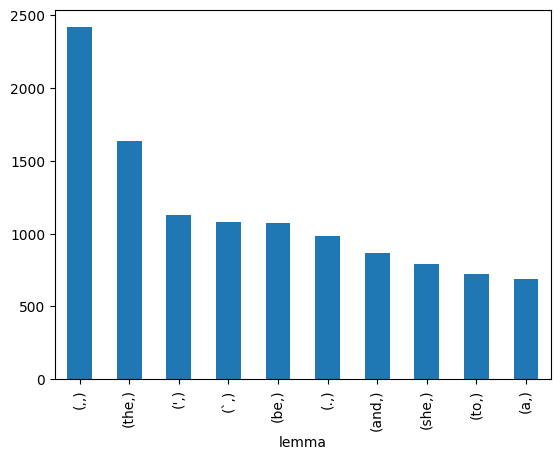

In [62]:
word_df.value_counts(['lemma']).head(10).plot(kind="bar")

## 37. Top-ten words co-occurring with 'Alice'

Extract the list of words that co-occur with the word “Alice”. Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word “Alice” and their frequencies.

In [70]:
alice_only_sentences = []
for sentence in token_list:
    is_alice = False
    for word in sentence:
        if word['form'].lower() == 'alice':
            is_alice = True
            continue
    if is_alice:
        alice_only_sentences.append(sentence)
alice_df = pd.DataFrame([word for sentence in alice_only_sentences for word in sentence])

<Axes: xlabel='lemma'>

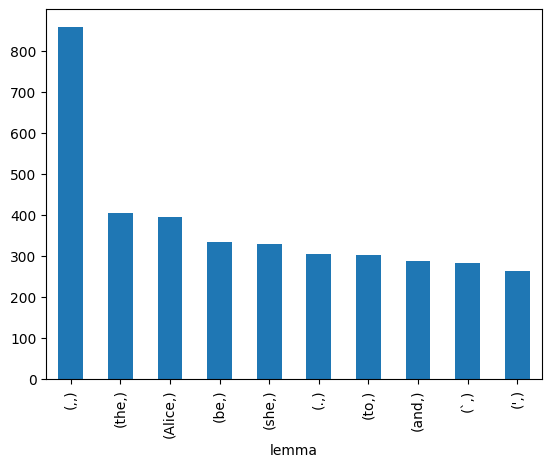

In [71]:
alice_df.value_counts(['lemma']).head(10).plot(kind="bar")

## 38. Histogram

Draw a histogram of word frequency (x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus, and the y-axis is the count of unique words that fall into the count of the x value).

In [74]:
alice_df.value_counts(['lemma'])

lemma  
,          857
the        405
Alice      395
be         333
she        329
          ... 
magic        1
mallet       1
manner       1
manners      1
offer        1
Name: count, Length: 1193, dtype: int64

<Axes: ylabel='Frequency'>

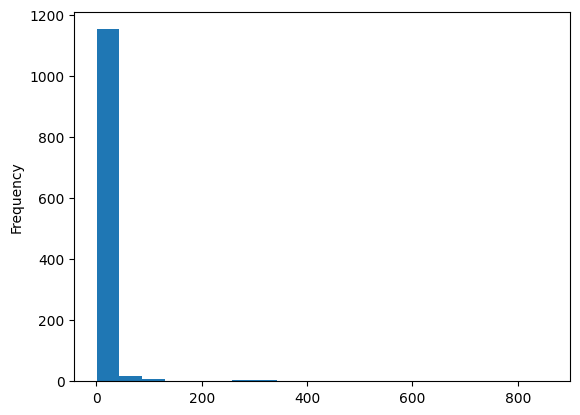

In [75]:
alice_df.value_counts(['lemma']).plot(kind="hist", bins=20)

## 39. Zipf's law

Plot a log-log graph with the x-axis being rank order and the y-axis being frequency..

<Axes: >

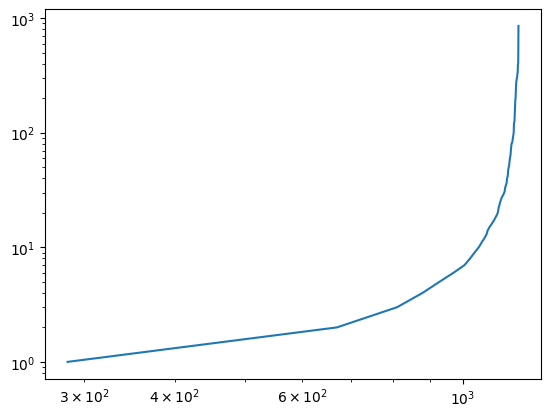

In [82]:
x = alice_df.value_counts(['lemma']).rank().to_list()
y = alice_df.value_counts(['lemma']).to_list()
zipf_df = pd.DataFrame(data=y, index=x)
zipf_df.plot(loglog=True, legend=False)

# Chapter 5: Dependency parsing 

The zip archive ai.en.zip contains the text of the Wikipedia article, “Artificial Intelligence”. Apply a dependency parser to the text, and store the result in a file. Implement programs that read the dependency trees and perform the jobs.

For your convenience, the zip archive also includes ai.en.txt.json, the text with dependency trees predicted by Stanford CoreNLP and stored in JSON format.

In [1]:
import json
import pandas as pd
with open("nlp100-files/chapter5/ai.en/ai.en.txt.json") as f:
    json_zip = json.loads(f.read())
json_zip.keys()

dict_keys(['docId', 'sentences'])

In [2]:
json_zip['sentences'][0].keys()

dict_keys(['index', 'basicDependencies', 'enhancedDependencies', 'enhancedPlusPlusDependencies', 'tokens'])

## 40. Read the parse result (words)

Design a class Word that represents a word. This class has three member variables, text (word surface), lemma (lemma), and pos (part-of-speech). Represent a sentence as an array of instances of Word class. Implement a program to load the parse result, and store the text as an array of sentences. Show the object of the first sentence of the body of the article.


In [3]:
class Word:
    def __init__(self, text, lemma, pos) -> None:
        self.text = text
        self.lemma = lemma
        self.pos = pos
    def __repr__(self):
        return f'<Word(surface={self.text},lemma={self.lemma},pos={self.pos})>'
res = []
for token in json_zip['sentences'][0]['tokens']:
    temp = Word(token['word'],token['lemma'],token['pos'])
    res.append(temp)
print(res)

[<Word(surface=In,lemma=in,pos=IN)>, <Word(surface=computer,lemma=computer,pos=NN)>, <Word(surface=science,lemma=science,pos=NN)>, <Word(surface=,,lemma=,,pos=,)>, <Word(surface=artificial,lemma=artificial,pos=JJ)>, <Word(surface=intelligence,lemma=intelligence,pos=NN)>, <Word(surface=-LRB-,lemma=-lrb-,pos=-LRB-)>, <Word(surface=AI,lemma=ai,pos=NN)>, <Word(surface=-RRB-,lemma=-rrb-,pos=-RRB-)>, <Word(surface=,,lemma=,,pos=,)>, <Word(surface=sometimes,lemma=sometimes,pos=RB)>, <Word(surface=called,lemma=call,pos=VBN)>, <Word(surface=machine,lemma=machine,pos=NN)>, <Word(surface=intelligence,lemma=intelligence,pos=NN)>, <Word(surface=,,lemma=,,pos=,)>, <Word(surface=is,lemma=be,pos=VBZ)>, <Word(surface=intelligence,lemma=intelligence,pos=NN)>, <Word(surface=demonstrated,lemma=demonstrate,pos=VBN)>, <Word(surface=by,lemma=by,pos=IN)>, <Word(surface=machines,lemma=machine,pos=NNS)>, <Word(surface=,,lemma=,,pos=,)>, <Word(surface=in,lemma=in,pos=IN)>, <Word(surface=contrast,lemma=contrast,p

## 41. Read the parse result (dependency)

In addition to problem 40, add three member variables head (a reference to the object of its syntactic governor), dep (dependency type to its governor), and children (a list of references to the syntactic dependents in the parse tree) to the class Word. Show the pairs of governors (parents) and their dependents (children) of the first sentence of the body of the article. Use the class Word in the rest of the problems in this chapter.


In [4]:
class Word:
    def __init__(self, index, text, lemma, pos) -> None:
        self.index = index
        self.text = text
        self.lemma = lemma
        self.pos = pos
        self.head = {} #Head obj : Dep
        self.children = {} #Child obj : Dep
    def __repr__(self):
        return f'<Word(index={self.index},gloss={self.text})>'
    def set_child(self, child, child_dep) -> None:
        try:
            self.children[child] = child_dep
        except Exception as e:
            print(e, self.index)
    def set_head(self, head, head_dep) -> None:
        try:
            self.head[head] = head_dep
        except Exception as e:
            print(e, self.index)
    def words_result(self) -> None:
        return f'<Word(surface={self.text},lemma={self.lemma},pos={self.pos})>'
    def dependency_pair(self) -> None:
        if not self.children:
            return
        return f'{self} >>-->> {self.children}'
res = [Word(0,'ROOT','ROOT','ROOT')]
for token in json_zip['sentences'][0]['tokens']:
    temp = Word(token['index'],token['word'],token['lemma'],token['pos'])
    res.append(temp)
for dependency in json_zip['sentences'][0]['basicDependencies']:
    head_idx = dependency['governor']
    dep_idx = dependency['dependent']
    dep_type = dependency['dep']
    res[head_idx].set_child(res[dep_idx],dep_type)
    res[dep_idx].set_head(res[head_idx],dep_type)
[x.dependency_pair() for x in res if x.dependency_pair() ]

["<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=12,gloss=called)>: 'ROOT'}",
 "<Word(index=3,gloss=science)> >>-->> {<Word(index=1,gloss=In)>: 'case', <Word(index=2,gloss=computer)>: 'compound'}",
 "<Word(index=6,gloss=intelligence)> >>-->> {<Word(index=5,gloss=artificial)>: 'amod', <Word(index=8,gloss=AI)>: 'appos', <Word(index=10,gloss=,)>: 'punct'}",
 "<Word(index=8,gloss=AI)> >>-->> {<Word(index=7,gloss=-LRB-)>: 'punct', <Word(index=9,gloss=-RRB-)>: 'punct'}",
 "<Word(index=12,gloss=called)> >>-->> {<Word(index=3,gloss=science)>: 'nmod', <Word(index=4,gloss=,)>: 'punct', <Word(index=6,gloss=intelligence)>: 'nsubj', <Word(index=11,gloss=sometimes)>: 'advmod', <Word(index=14,gloss=intelligence)>: 'xcomp', <Word(index=15,gloss=,)>: 'punct', <Word(index=16,gloss=is)>: 'advcl', <Word(index=33,gloss=.)>: 'punct'}",
 "<Word(index=14,gloss=intelligence)> >>-->> {<Word(index=13,gloss=machine)>: 'compound'}",
 "<Word(index=16,gloss=is)> >>-->> {<Word(index=17,gloss=intelligence)>: 'nsubj'}"

## 42. Show root words

For each sentence, extract the root word (whose head is ROOT).


In [5]:
sentences_dep = []
for sentence in json_zip['sentences']:
    res = [Word(0,'ROOT','ROOT','ROOT')]
    for token in sentence['tokens']:
        temp = Word(token['index'],token['word'],token['lemma'],token['pos'])
        res.append(temp)
    for dependency in sentence['basicDependencies']:
        head_idx = dependency['governor']
        dep_idx = dependency['dependent']
        dep_type = dependency['dep']
        res[head_idx].set_child(res[dep_idx],dep_type)
        res[dep_idx].set_head(res[head_idx],dep_type)
    sentences_dep.append(res)
    print(res[0].dependency_pair())

<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=12,gloss=called)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=4,gloss=define)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=11,gloss=used)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=16,gloss=removed)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=7,gloss=says)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=9,gloss=excluded)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=5,gloss=classified)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=4,gloss=founded)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=11,gloss=divided)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=4,gloss=based)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=5,gloss=based)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=11,gloss=include)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(index=9,gloss=goals)>: 'ROOT'}
<Word(index=0,gloss=ROOT)> >>-->> {<Word(in

## 43. Show verb governors and noun dependents

Show all pairs of verb governors (parents) and their noun dependents (children) from all sentences in the text.


In [6]:
for sentence in sentences_dep:
    for word in sentence:
        if 'VB' in word.pos:
            noun_child = [x for x in word.children if 'NN' in x.pos]
            print(f"{word.text} -> {noun_child}")

called -> [<Word(index=3,gloss=science)>, <Word(index=6,gloss=intelligence)>, <Word(index=14,gloss=intelligence)>]
is -> [<Word(index=17,gloss=intelligence)>]
demonstrated -> [<Word(index=20,gloss=machines)>]
displayed -> [<Word(index=30,gloss=humans)>]
Leading -> []
define -> [<Word(index=3,gloss=textbooks)>, <Word(index=6,gloss=field)>, <Word(index=9,gloss=study)>]
perceives -> [<Word(index=21,gloss=environment)>]
takes -> [<Word(index=24,gloss=actions)>]
maximize -> [<Word(index=28,gloss=chance)>]
achieving -> [<Word(index=33,gloss=goals)>]
is -> []
used -> [<Word(index=7,gloss=intelligence)>]
describe -> [<Word(index=14,gloss=machines)>]
mimic -> [<Word(index=24,gloss=functions)>]
associate -> [<Word(index=26,gloss=humans)>, <Word(index=31,gloss=mind)>]
learning -> []
solving -> [<Word(index=40,gloss=problem)>]
become -> [<Word(index=2,gloss=machines)>]
considered -> []
require -> [<Word(index=12,gloss=intelligence)>]
are -> []
removed -> [<Word(index=7,gloss=tasks)>, <Word(index=1

## 44. Visualize dependency trees

Visualize a dependency tree of a sentence as a directed graph. Consider converting a dependency tree into DOT language and use Graphviz for drawing a directed graph. In addition, you can use pydot for drawing a dependency tree.


In [7]:
import pydot
queue = [sentences_dep[0][0]]
def bfs(graph,queue):
    while(queue):
        node = queue[0]
        del queue[0]
        graph.add_node(pydot.Node(f'"{node.text}"', shape='circle'))
        for head,head_dep in node.head.items():
            graph.add_edge(pydot.Edge(f'"{head.text}"', f'"{node.text}"', label=head_dep))
        for child in node.children.keys():
            queue.append(child)
    return graph

graph = pydot.Dot("dep_graph", graph_type="digraph")
graph = bfs(graph, queue)
graph.write_png('nlp100-files/chapter5/number44.png')

## 45. Triple with subject, verb, and direct object

We are interested in extracting facts from the text. In this chapter, we represent a fact as a tuple of (subject, predicate, object). Extract tuples from dependency trees where:

- *subject* is a nominal subject of a verb in the past tense
- *predicate* is the verb in the past tense
- *object* is a direct object of the verb

Consider an example sentence, “Frank Rosenblatt invented the perceptron”. We want to extract a tuple, (Rosenblatt, invented, perceptron), from the sentence. In this problem, we only consider a subject and object as a single word
This graph shows a dependency tree for the sentence (this may vary depending on the parser)

SVO

In order to extract a tuple from a dependency tree, it may be a good idea to design an extraction rule on the dependency tree, for example,
{subject}←---nsubj{predicate}pos=VBD-→-dobj{object}.


In [8]:
res = []
for sentence in sentences_dep:
    for word in sentence:
        subjects = []
        objects = []
        predicate = None
        if 'VBD' in word.pos:
            predicate = word.text
            for child,child_dep in word.children.items():
                if child_dep in ['nsubj', 'nsubjpass']:
                    subjects.append(child.text)
                if child_dep in ['dobj','iobj']:
                    objects.append(child.text)
        for subject in subjects:
            for object in objects:
                res.append((subject, predicate, object))
res

[('characters', 'raised', 'many'),
 ('this', 'led', 'researchers'),
 ('They', 'produced', 'programs'),
 ('governments', 'cut', 'research'),
 ('project', 'inspired', 'U.S'),
 ('development', 'enabled', 'development'),
 ('match', 'defeated', 'champions'),
 ('computers', 'enabled', 'advances'),
 ('AlphaGo', 'won', '4'),
 ('AlphaGo', 'won', 'games'),
 ('AlphaGo', 'won', 'match'),
 ('who', 'held', 'ranking'),
 ('This', 'marked', 'completion'),
 ('they', 'had', 'AI'),
 ('China', 'accelerated', 'funding'),
 ('that', 'undiscovered', 'swans'),
 ('they', 'advocated', 'violence'),
 ('researchers', 'developed', 'algorithms'),
 ('that', 'imitated', 'reasoning'),
 ('they', 'experienced', 'explosion'),
 ('DeepMind', 'developed', 'intelligence'),
 ('number', 'explored', 'connection'),
 ('Some', 'built', 'machines'),
 ('that', 'used', 'networks'),
 ('one', 'developed', 'style'),
 ('Simon', 'studied', 'skills'),
 ('work', 'laid', 'foundations'),
 ('team', 'used', 'results'),
 ('people', 'used', 'algorit

## 46. Expanding subjects and objects

Improve the program of Problem 45 to remove the restriction that subjects and objects are single words but can also be phrases. For example, we want to extract (Frank Rosenblatt, invented, perceptron) from the sentence, “Frank Rosenblatt invented the perceptron”.


In [9]:
sentences_dep[22][3].head,sentences_dep[22][3].children

({<Word(index=4,gloss=appeared)>: 'nsubj'},
 {<Word(index=1,gloss=Thought-capable)>: 'amod',
  <Word(index=2,gloss=artificial)>: 'amod'})

In [10]:
test_df = pd.DataFrame(json_zip['sentences'][22]['tokens'])
test_df.loc[test_df['pos']=='VBD']

,index,word,originalText,lemma,characterOffsetBegin,characterOffsetEnd,pos,before,after
3,4,appeared,appeared,appear,3650,3658,VBD,,


In [11]:
pd.DataFrame(json_zip['sentences'][22]['basicDependencies']).sort_values('governor')

,dep,governor,governorGloss,dependent,dependentGloss
0,ROOT,0,ROOT,4,appeared
1,amod,3,beings,1,Thought-capable
2,amod,3,beings,2,artificial
3,nsubj,4,appeared,3,beings
6,nmod,4,appeared,7,devices
13,conj,4,appeared,14,common
10,cc,4,appeared,11,and
9,punct,4,appeared,10,","
38,punct,4,appeared,39,.
4,case,7,devices,5,as


In [12]:
def find_phrases(word: Word):
    comp=""
    # print(word.children)
    for w, w_dep in word.children.items():
        if w_dep in ['amod','compound','name']:
            comp = find_phrases(w)+" "
    return f"{comp}{word.text}"
res = []
for sentence in sentences_dep:
    for word in sentence:
        subjects = []
        objects = []
        predicate = None
        if 'VBD' in word.pos:
            predicate = word.text
            for child,child_dep in word.children.items():
                if child_dep in ['nsubj', 'nsubjpass']:
                    text = find_phrases(child)
                    subjects.append(text)
                if child_dep in ['dobj','iobj']:
                    text = find_phrases(child)
                    objects.append(text)
        for subject in subjects:
            for object in objects:
                res.append((subject, predicate, object))
res

[('characters', 'raised', 'many'),
 ('this', 'led', 'researchers'),
 ('They', 'produced', 'programs'),
 ('U.S. governments', 'cut', 'exploratory research'),
 ('computer project', 'inspired', 'U.S'),
 ('development', 'enabled', 'development'),
 ('exhibition match', 'defeated', 'Jeopardy! champions'),
 ('Faster computers', 'enabled', 'advances'),
 ('AlphaGo', 'won', '4'),
 ('AlphaGo', 'won', 'games'),
 ('AlphaGo', 'won', 'three-game match'),
 ('who', 'held', 'No. ranking'),
 ('This', 'marked', 'completion'),
 ('they', 'had', 'incorporated AI'),
 ('China', 'accelerated', 'government funding'),
 ('that', 'undiscovered', 'black swans'),
 ('they', 'advocated', 'violence'),
 ('researchers', 'developed', 'algorithms'),
 ('that', 'imitated', 'step-by-step reasoning'),
 ('they', 'experienced', 'combinatorial explosion'),
 ('DeepMind', 'developed', 'artificial intelligence'),
 ('number', 'explored', 'connection'),
 ('Some', 'built', 'machines'),
 ('that', 'used', 'electronic networks'),
 ('one', 

## 47. Triple from the passive sentence

Extract facts from sentences in the passive voice. Consider an example sentence, “Artificial intelligence was founded as an academic discipline in 1955”. We want to extract two tuples from the sentence,

- (Artificial intelligence, founded-as, academic discipline)
- (Artificial intelligence, founded-in, 1955)


In [13]:
res = []
for sentence in sentences_dep:
    for word in sentence:
        subjects = []
        objects = []
        predicate = None
        for child,child_dep in word.children.items():
            if child_dep in ['nsubjpass','csubjpass']:
                predicate = word.text
                text = find_phrases(child)
                subjects.append(text)
        if predicate:
            for child,child_dep in word.children.items():
                if child_dep in ['nmod']:
                    text = find_phrases(child)
                    object = text
                    for grandchild, grc_dep in child.children.items():
                        if grc_dep == 'case':
                            final_pred = f"{predicate}-{grandchild.text}"
                            for subject in subjects:
                                res.append((subject, final_pred, object))
res

[('tasks', 'removed-from', 'definition'),
 ('character recognition', 'excluded-For', 'instance'),
 ('character recognition', 'excluded-from', 'things'),
 ('Artificial intelligence', 'founded-as', 'academic discipline'),
 ('Artificial intelligence', 'founded-in', '1955'),
 ('AI research', 'divided-For', 'most'),
 ('AI research', 'divided-into', 'sub-fields'),
 ('sub-fields', 'based-on', 'technical considerations'),
 ('Sub-fields', 'based-on', 'social factors'),
 ('Many tools', 'used-in', 'AI'),
 ('Many tools', 'used-including', 'versions'),
 ('field', 'founded-on', 'assumption'),
 ('issues', 'explored-by', 'myth'),
 ('issues', 'explored-since', 'antiquity'),
 ('insight', 'known-as', 'Church'),
 ('field', 'born-at', 'workshop'),
 ('field', 'born-in', '1956'),
 ('term', 'coined-by', 'John McCarthy'),
 ('research', 'funded-By', 'middle'),
 ('research', 'funded-by', 'Department'),
 ('funded', 'established-around', 'world'),
 ('AI research', 'revived-In', 'early 1980s'),
 ('AI research', 're

## 48. Extract paths from the root to nouns

For every noun in a dependency tree, extract a path from the root to the noun. Here, each path must satisfy the following specifications

- Nodes in a path are words in surface form
- Nodes are connected with “ -> “ from the root to the leaf node
- We don't have to include dependency types (e.g., nsubj, dobj) when representing a dependency path

For the example sentence, “Frank Rosenblatt invented the perceptron”, we expect an output,
```
invented -> Rosenblatt
invented -> Rosenblatt -> Frank
invented -> perceptron
```


In [20]:
paths = []
def dfs_lookup(word):
    if 'ROOT' in word.head.values():
        return f"{word.text}"
    head_w = dfs_lookup(list(word.head.keys())[0])
    return f"{head_w} -> {word.text}"
for sentence in sentences_dep:
    for word in sentence:
        if 'NN' in word.pos:
            path = dfs_lookup(word)
            paths.append(path)
paths = list(set(paths))
paths

['agreed -> Minsky',
 'defines -> study -> agents -> device -> perceives -> takes -> actions -> maximize -> chance -> achieving -> goals',
 'means -> makes -> ways',
 'occurrence -> singularity',
 'combine -> continue -> lack -> understanding',
 'theoretically -> data -> time',
 'derive -> learners',
 'suggested -> rule',
 'vogue -> add -> soup -> applications -> Recognition -> Speech',
 'due -> success',
 'coordinate -> algorithms',
 'introduced -> become -> guided -> questions -> identifies -> Computers -> Making -> Decisions -> Moral',
 'inspired -> applications -> usage -> produce -> art',
 'introduced -> way -> networks -> FNNs',
 'claimed -> supervised -> performed -> stitching -> bowel',
 'suggest -> Weizenbaum',
 'risk',
 'skip -> looking -> path -> Francisco',
 'writes -> Leading -> Brooks -> researcher',
 'used -> allow -> contribute -> rules -> increase -> pressure',
 'is -> goal -> intelligence',
 'researching -> 50 -> countries',
 'appeared -> common -> Frankenstein -> R.U

## 49. Extract the shortest path between two nouns

Extract the shortest path for every pair of two nouns. Supposing that two nouns appear at the i-th and j-th positions (in words) in a sentence (i<j), the shortest path must satisfy the following specifications

- Nodes in a path are words in surface form
- Nodes corresponding to the i-th and j-th words are replaced with X and Y, respectively
- Nodes are connected with either “ -> “ or “ <- “ from X to Y to represent a direction of a dependency

We can consider two types of dependency paths

- When the j-th word appears on the path from the i-th word to the root: the path from the i-th word to the j-th word
- When the z-th and j-th words have the common ancestor (the k-th word) in the dependency tree: the path from the i-th word to the k-th word connected with “ <- “, followed by the path from the k-th word to the j-th word connected with “ -> “

For the example sentence, “Frank Rosenblatt invented the perceptron”, we expect an output,
```
X <- Y
X <- invented -> Y
X <- Rosenblatt <- invented -> Y
```


In [57]:
def shortest_path_to_root(paths,queue):
    while(queue):
        node,path = queue[0]
        if 'NN' in node.pos:
            paths.append(path)
        if 'ROOT' in node.head.values():
            paths.append(path)
            break
        del queue[0]
        for head in node.head.keys():
            queue.append((head,path+[head]))
    return paths
def print_path_no_root(path):
    path_str = "X"
    for w in path[1:-1]:
        path_str = f"{path_str} <- {w.text}"
    return f"{path_str} <- Y"
def print_path_root(path_x,path_y):
    path_str = "X <- "
    path_str = path_str + " <- ".join([w.text for w in path_x[1:]]) + " -> ".join([w.text for w in path_x[1:-1:-1]]) + " -> Y"
    return path_str

found_paths = []
for sentence in sentences_dep:
    all_paths = {}
    noun_word = []
    root_w = None
    for word in sentence:
        if 'ROOT' in word.head.values():
            root_w = word
        if 'NN' in word.pos:
            noun_word.append(word)
    for word_x in noun_word:
        all_paths[word_x] = shortest_path_to_root([], [(word_x,[word_x])])
    for word_x in noun_word:
        for word_y in noun_word:
            if word_x == word_y:
                break
            straight_path = None
            for path in all_paths[word_x]:
                if word_y == path[-1]:
                    straight_path = path
                    break
            if straight_path:
                found_paths.append(print_path_no_root(straight_path))
                break
            else:
                root_path_x = all_paths[word_x][-1]
                root_path_y = all_paths[word_y][-1]
                found_paths.append(print_path_root(root_path_x,root_path_y))
                
found_paths = list(set(found_paths))
found_paths

['X <- translate <- system <- development <- include -> Y',
 'X <- derive -> Y',
 'X <- platoons <- testing <- begin <- legislation <- passed -> Y',
 'X <- engineering <- science <- Y',
 'X <- wins <- evidence <- used -> Y',
 'X <- reason <- systems -> Y',
 'X <- forms <- do -> Y',
 'X <- shown <- happens <- consider -> Y',
 'X <- painted -> Y',
 "X <- safety <- increasing <- disease <- '' <- , <- believes -> Y",
 'X <- rule <- suggested -> Y',
 'X <- development <- place <- constraints <- contrast <- equivalent <- demonstrate <- issue <- centered -> Y',
 'X <- provide -> Y',
 'X <- different <- multiple <- use -> Y',
 'X <- book <- expanded <- stage <- argues -> Y',
 'X <- effect <- described <- considered -> Y',
 'X <- gather <- attempt <- systems -> Y',
 'X <- tools <- increase <- rise <- Y',
 'X <- lags <- suggests -> Y',
 'X <- Management <- solutions <- Y',
 'X <- Head <- Y',
 'X <- Congress <- criticism <- response <- 1974 <- cut <- slowed -> Y',
 'X <- processes <- Y',
 'X <- w

# Chapter 6: Machine Learning

In this chapter, we tackle the task of news classification. The task is to classify a given news headline to one of the following categories: “Business”, “Science”, “Entertainment” and “Health”. News Aggregator Data Set provided by Fabio Gasparetti, is the dataset we use in this chapter.

## 50. Download and Preprocess Dataset

Download News Aggregator Data Set and create training data (train.txt), validation data (valid.txt) and test data (test.txt) as follows:

1. Unpack the downloaded zip file and read readme.txt.
2. Extract the articles such that the publisher is one of the followings: “Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com” and “Daily Mail”.
3. Randomly shuffle the extracted articles.
4. Split the extracted articles in the following ratio: the training data (80%), the validation data (10%) and the test data (10%). Then save them into files train.txt, valid.txt and test.txt, respectively. In each file, each line should contain a single instance. Each instance should contain both the name of the category and the article headline. Use Tab to separate each field.

After creating the dataset, check the number of instances contained in each category.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


data_df = pd.read_csv("nlp100-files/chapter6/news_aggregator/uci-news-aggregator.csv")
data_df = data_df.loc[data_df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com','Daily Mail'])]
train_df, val_df = train_test_split(data_df, test_size=0.2, shuffle=True)
val_df, test_df = train_test_split(val_df, test_size=0.5,shuffle=True)

train_df.to_csv("nlp100-files/chapter6/train.txt", sep="\t", index=None)
val_df.to_csv("nlp100-files/chapter6/val.txt", sep="\t", index=None)
test_df.to_csv("nlp100-files/chapter6/test.txt", sep="\t", index=None)

In [2]:
train_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
175947,176283,Warren Buffett: 'I Don't Really Want To Embarr...,http://www.huffingtonpost.com/2014/05/05/warre...,Huffington Post,b,dGlfuHFHIuo8fjMGBl3e-FDiwgFqM,www.huffingtonpost.com,1399303001365
252609,253055,Thomas Piketty and Capitalism Beyond the 21st ...,http://www.huffingtonpost.com/harlan-green/tho...,Huffington Post,b,d_YPtA19W2cCWlMTd1NeTJG_0zNLM,www.huffingtonpost.com,1401162098540
329200,329660,Making a quick getaway? Jenny McCarthy 'flees ...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,dlsH-ct2ezt57cM5KkJn7lmtxvjyM,www.dailymail.co.uk,1403941474993
243646,244092,Maxim's 2014 Hot 100 List Is Here And Candice ...,http://www.huffingtonpost.com/2014/05/23/maxim...,Huffington Post,e,dNDqsZoRswAXctM72mPKqPeQsuB1M,www.huffingtonpost.com,1400881952583
51253,51254,UPDATE 1-White House says Obamacare enrollment...,http://in.reuters.com/article/2014/03/27/usa-h...,Reuters,b,dX_1xb_RhqzhxSMFMhlClC0E7syTM,in.reuters.com,1395950099676


## 51. Feature extraction

Extract a set of features from the training, validation and test data, respectively. Save the features into files as follows: train.feature.txt, valid.feature.txt and test.feature.txt. Design the features that are useful for the news classification. The minimum baseline for the features is the tokenized sequence of the news headline.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_token(text):
    wnl = WordNetLemmatizer()
    word_arr = word_tokenize(text)
    lemma_arr = [wnl.lemmatize(w) for w in word_arr]
    return " ".join(lemma_arr)


tfidf_vec = TfidfVectorizer(stop_words='english', lowercase=True)
train_df['TITLE'] = train_df['TITLE'].apply(clean_token)
train_seq = tfidf_vec.fit_transform(train_df['TITLE'])
train_feature_df = pd.DataFrame(train_seq.toarray(),columns=tfidf_vec.get_feature_names_out())

val_df['TITLE'] = val_df['TITLE'].apply(clean_token)
val_seq = tfidf_vec.transform(val_df['TITLE'])
val_feature_df = pd.DataFrame(val_seq.toarray(),columns=tfidf_vec.get_feature_names_out())

test_df['TITLE'] = test_df['TITLE'].apply(clean_token)
test_seq = tfidf_vec.transform(test_df['TITLE'])
test_feature_df = pd.DataFrame(test_seq.toarray(),columns=tfidf_vec.get_feature_names_out())

In [4]:
train_feature_df.to_csv("nlp100-files/chapter6/train.feature.txt", sep="\t", index=None)
val_feature_df.to_csv("nlp100-files/chapter6/val.feature.txt", sep="\t", index=None)
test_feature_df.to_csv("nlp100-files/chapter6/test.feature.txt", sep="\t", index=None)

## 52. Training

Use the training data from the problem 51 and train the logistic regression model.

In [5]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(train_feature_df, y=train_df['CATEGORY'])

LogisticRegression()

## 53. Prediction

Use the logistic regression model from the problem 52. Create a program that predicts the category of a given news headline and computes the prediction probability of the model.

In [6]:
example_headlines = [
"Scientists Discover New Species of Bioluminescent Fish in Deep Ocean",
"Political Leaders Reach Historic Agreement on Climate Change Targets",
"Tech Giant Unveils Revolutionary AI Translator for Global Communication",
"Local Community Celebrates Grand Opening of Eco-Friendly Park",
"Breakthrough Study Links Diet to Longevity in Aging Population"
]
processed_headlines = tfidf_vec.transform([clean_token(x) for x in example_headlines])
logreg_model.predict_proba(processed_headlines)

/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.16691577, 0.1883721 , 0.13143255, 0.51327958],
       [0.25927136, 0.15316368, 0.04623165, 0.54133331],
       [0.48452059, 0.13160494, 0.0544935 , 0.32938097],
       [0.1455843 , 0.74466164, 0.03995992, 0.06979414],
       [0.13951754, 0.16896511, 0.56240093, 0.12911642]])

## 54. Accuracy score

Compute the accuracy score of the logistic regression model from the problem 52 on both the training data and the test data.

In [7]:
from sklearn.metrics import accuracy_score

pred_res = logreg_model.predict(test_feature_df)
print(accuracy_score(test_df['CATEGORY'],pred_res))

0.9017991004497751


## 55. Confusion matrix

Create the confusion matrix of the logistic regression model from the problem 52 for both the training data and the test data.

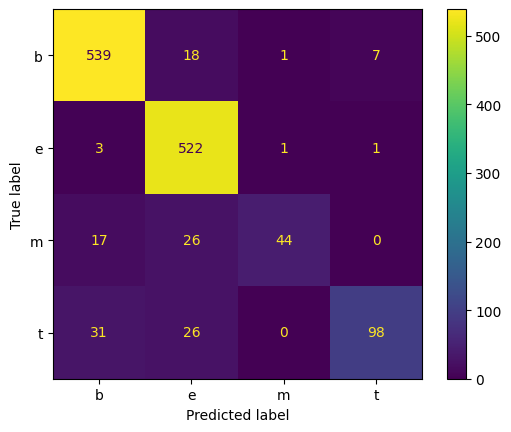

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_res = confusion_matrix(test_df['CATEGORY'], pred_res)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_res, display_labels=logreg_model.classes_)
disp.plot()
plt.show()

## 56. Precision, recall and F1 score

Compute the precision, recall and F1 score of the logistic regression model from the problem 52. First, compute these metrics for each category. Then summarize the score of each category using (1) micro-average and (2) macro-average.

In [13]:
type(pred_res)

numpy.ndarray

In [24]:
from sklearn.metrics import precision_score,recall_score,f1_score

for cat in logreg_model.classes_:
    y_true = test_df['CATEGORY'].apply(lambda x: 1 if x==cat else 0)
    y_pred = (pred_res == cat).astype(int)
    print(f"Precision score for {cat} class: {precision_score(y_true,y_pred)}")
    print(f"Recall score for {cat} class: {recall_score(y_true,y_pred)}")
    print(f"F1 score for {cat} class: {f1_score(y_true,y_pred)}")
    print("\n")

for avg in ['micro','macro']:
    y_true = test_df['CATEGORY']
    y_pred = pred_res
    print(f"Precision score {avg} average: {precision_score(y_true,y_pred,average=avg)}")
    print(f"Recall score {avg} average: {recall_score(y_true,y_pred,average=avg)}")
    print(f"F1 score {avg} average: {f1_score(y_true,y_pred,average=avg)}")
    print("\n")

Precision score for b class: 0.9135593220338983
Recall score for b class: 0.9539823008849557
F1 score for b class: 0.9333333333333333


Precision score for e class: 0.8817567567567568
Recall score for e class: 0.9905123339658444
F1 score for e class: 0.9329758713136729


Precision score for m class: 0.9565217391304348
Recall score for m class: 0.5057471264367817
F1 score for m class: 0.6616541353383458


Precision score for t class: 0.9245283018867925
Recall score for t class: 0.632258064516129
F1 score for t class: 0.7509578544061303


Precision score micro average: 0.9017991004497751
Recall score micro average: 0.9017991004497751
F1 score micro average: 0.9017991004497751


Precision score macro average: 0.9190915299519706
Recall score macro average: 0.7706249564509277
F1 score macro average: 0.8197302985978706




## 57. Feature weights

Use the logistic regression model from the problem 52. Check the feature weights and list the 10 most important features and 10 least important features.

In [39]:
logreg_coef = pd.DataFrame(logreg_model.coef_, columns=logreg_model.feature_names_in_,index=logreg_model.classes_)
for cat in logreg_coef.index:
    temp_df = logreg_coef.loc[cat].sort_values(key=abs, ascending=False).copy()
    print(f"Top 10 most important features for {cat} class")
    display(temp_df.head(10))
    print(f"Top 10 least important features for {cat} class")
    display(temp_df.tail(10))

Top 10 most important features for b class


stocks    3.688506
china     3.672896
fed       3.486259
bank      3.441834
ecb       3.275863
update    3.009145
profit    2.900631
euro      2.838586
oil       2.770067
dollar    2.707735
Name: b, dtype: float64

Top 10 least important features for b class


tweeting   -0.001092
faulty      0.000789
carrier     0.000563
nike       -0.000476
corner      0.000436
claim       0.000322
stopped    -0.000296
striking    0.000296
dock        0.000286
tuesday    -0.000061
Name: b, dtype: float64

Top 10 most important features for e class


update       -3.744353
kardashian    3.356564
google       -2.827800
chris         2.719568
star          2.690066
kim           2.615808
miley         2.489948
cyrus         2.468178
china        -2.464945
movie         2.412585
Name: e, dtype: float64

Top 10 least important features for e class


supreme      0.000498
rekindle     0.000486
turned       0.000411
pack        -0.000365
thought      0.000334
netflix      0.000323
confesses    0.000279
powers       0.000266
winter      -0.000095
cards        0.000039
Name: e, dtype: float64

Top 10 most important features for m class


ebola     4.321016
study     3.732672
fda       3.543519
cancer    3.473555
drug      3.443744
mers      3.081292
health    2.576238
brain     2.236426
cdc       2.193423
heart     2.191968
Name: m, dtype: float64

Top 10 least important features for m class


210716          -0.000573
20headlines     -0.000573
1399985295162   -0.000573
1399985295432   -0.000573
1399983367406   -0.000573
1399983367118   -0.000573
148948          -0.000573
149002          -0.000573
earlier         -0.000278
grows            0.000083
Name: m, dtype: float64

Top 10 most important features for t class


google        5.667778
facebook      5.095846
apple         4.440699
climate       4.078151
microsoft     3.918230
gm            2.904338
tesla         2.836518
comcast       2.813684
nasa          2.630638
neutrality    2.286800
Name: t, dtype: float64

Top 10 least important features for t class


1399983366926   -0.001257
148948          -0.001257
consumer         0.001107
clone            0.000576
think           -0.000416
driver          -0.000404
portfolio       -0.000178
mini            -0.000138
fine            -0.000100
stephen          0.000092
Name: t, dtype: float64

## 58. Regularization

When training a logistic regression model, one can control the degree of overfitting by manipulating the regularization parameters. Use different regularization parameters to train the model. Then, compute the accuracy score on the training data, validation data and test data. Summarize the results on the graph, where x-axis is the regularization parameter and y-axis is the accuracy score.

In [45]:
reg_val = [0.01]+[i/10 for i in range(1,11)]
acc_scores = {
    'train':[],
    'val':[],
    'test':[]
}
for reg in reg_val:
    model = LogisticRegression(C=reg)
    model.fit(train_feature_df,train_df['CATEGORY'])
    acc_scores['train'].append(model.score(train_feature_df,train_df['CATEGORY']))
    acc_scores['val'].append(model.score(val_feature_df,val_df['CATEGORY']))
    acc_scores['test'].append(model.score(test_feature_df,test_df['CATEGORY']))

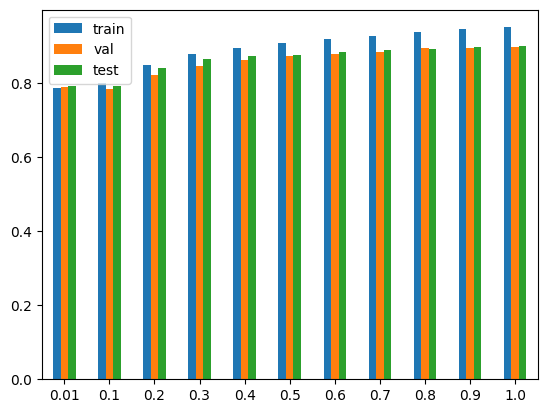

In [55]:
reg_df = pd.DataFrame(acc_scores, index=reg_val)
# reg_df
reg_df.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## 59. Hyper-parameter tuning

Use different training algorithms and parameters to train the model for the news classification. Search for the training algorithms and parameters that achieves the best accuracy score on the validation data. Then compute its accuracy score on the test data.

In [60]:
from sklearn.model_selection import ParameterGrid
params = {
    'penalty':['l2','l1','elasticnet'],
    'solver':['lbfgs','newton-cg','sag','saga'],
    'C':[0.001,0.01,1,10],
    'random_state':[10]
}
best_model = None
best_param = None
best_acc = 0
for param in ParameterGrid(params):
    if param['penalty'] not in ['l2',None] and param['solver']!='saga':
        continue
    if param['penalty'] == 'elasticnet':
        param['l1_ratio'] = 0.5
    logreg = LogisticRegression(**param)
    logreg.fit(train_feature_df,train_df['CATEGORY'])
    score = logreg.score(val_feature_df,val_df['CATEGORY'])
    if score > best_acc:
        best_acc = score
        best_model = logreg
        best_param = param
print("Best parameters:", best_param)
print("Best accuracy:", best_acc)

test_score = best_model.score(test_feature_df,test_df['CATEGORY'])
print("Accuracy on test data:", test_score)

/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 10, 'penalty': 'l2', 'random_state': 10, 'solver': 'lbfgs'}
Best accuracy: 0.9235382308845578
Accuracy on test data: 0.9332833583208395


# Chapter 7: Word Vector

This chapter introduces the concept of the word vectors (i.e., word embeddings). Create the following problems.

## 60. Loading word vectors

Download word vectors that are pretrained on Google News dataset (approx. 100 billion words). The file contains word vectors of 3 million words/phrases, whose dimentionalities are 300. Print out the word vector of the term “United States”. Note that “United States” is represented as “United_States” in the file.

In [1]:
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format("nlp100-files/chapter7/GoogleNews-vectors-negative300.bin", binary=True)
model.save_word2vec_format("nlp100-files/chapter7/GoogleNews-vectors-negative300.txt", binary=False)

## 61. Word similarity

Compute the cosine similarity between “United States” and “U.S.”

In [7]:
model.similarity('United_States', 'U.S')

0.3638412

## 62. Top-10 most similar words

Find the top-10 words that have the highest cosine similarity with the word “United States” and print out the similarity score.


In [20]:
res = model.most_similar("United_States")
print("Word | Similarity Score")
for word, sim_score in res:
    print(f"{word} | {sim_score}")

Word | Similarity Score
Unites_States | 0.7877248525619507
Untied_States | 0.7541370987892151
United_Sates | 0.7400724291801453
U.S. | 0.7310774326324463
theUnited_States | 0.6404393911361694
America | 0.6178410053253174
UnitedStates | 0.6167312264442444
Europe | 0.6132988929748535
countries | 0.6044804453849792
Canada | 0.601906955242157


## 63. Analogy based on the additive composition

Subtract the vector of “Madrid” from the vector of “Spain” and then add the vector of “Athens”. Compute the top-10 most similar words with the output vector.

In [19]:
res = model['Spain'] - model['Madrid'] + model['Athens']
res = model.most_similar(res)
print("Word | Similarity Score")
for word, sim_score in res:
    print(f"{word} | {sim_score}")

Word | Similarity Score
Athens | 0.7528455853462219
Greece | 0.6685472130775452
Aristeidis_Grigoriadis | 0.5495778322219849
Ioannis_Drymonakos | 0.5361457467079163
Greeks | 0.5351786017417908
Ioannis_Christou | 0.5330225825309753
Hrysopiyi_Devetzi | 0.5088489055633545
Iraklion | 0.5059264302253723
Greek | 0.5040615797042847
Athens_Greece | 0.5034108757972717


## 64. Analogy data experiment

Download word analogy evaluation dataset. Compute the vector as follows: vec(word in second column) - vec(word in first column) + vec(word in third column). From the output vector, (1) find the most similar word and (2) compute the similarity score with the word. Append the most similar word and its similarity to each row of the downloaded file.

In [56]:
import pandas as pd
def find_most_similar(df):
    global model
    vec = model[df["col2"]]-model[df["col1"]]+model[df["col3"]]
    res = model.most_similar(vec)
    most_sim_word, sim_score = res[0]
    return [vec,most_sim_word,sim_score]

question_df = pd.read_csv("nlp100-files/chapter7/questions-words.txt", sep=" ",header=None, names=['col1','col2','col3','col4'])
question_df[['output_vec','most_sim_word','sim_score']] = question_df.loc[question_df['col1']!= ":"].apply(find_most_similar,axis=1, result_type="expand")
question_df.head(20)

,col1,col2,col3,col4,output_vec,most_sim_word,sim_score
0,:,capital-common-countries,NaN,NaN,NaN,NaN,NaN
1,Athens,Greece,Baghdad,Iraq,"[0.16088867, 0.12445068, -0.114349365, 0.14501...",Baghdad,0.748983
2,Athens,Greece,Bangkok,Thailand,"[0.3671875, -0.055480957, -0.059173584, 0.3735...",Bangkok,0.743114
3,Athens,Greece,Beijing,China,"[0.07421875, 0.26287842, 0.1913147, 0.1743164,...",China,0.718659
4,Athens,Greece,Berlin,Germany,"[0.3486328, 0.32147217, 0.080841064, -0.012485...",Germany,0.672089
5,Athens,Greece,Bern,Switzerland,"[0.021484375, 0.07650757, 0.042022705, -0.1005...",Bern,0.690234
6,Athens,Greece,Cairo,Egypt,"[0.25878906, 0.23846436, -0.059173584, 0.30517...",Egypt,0.762682
7,Athens,Greece,Canberra,Australia,"[0.51171875, 0.034606934, -0.14950562, 0.22998...",Canberra,0.740721
8,Athens,Greece,Hanoi,Vietnam,"[0.18969727, 0.27166748, 0.16543579, 0.3754882...",Hanoi,0.750990
9,Athens,Greece,Havana,Cuba,"[-0.068359375, 0.014831543, 0.21572876, 0.3774...",Havana,0.726283


In [61]:
question_df[['col1','col2','col3','most_sim_word']].to_csv("nlp100-files/chapter7/analogies.txt",sep=" ",header=None,index=False)

## 65. Accuracy score on the analogy task

From the output of the problem 64, compute the accuracy score on both the semantic analogy and the syntactic analogy.

In [67]:
score, res = model.evaluate_word_analogies(analogies="nlp100-files/chapter7/analogies.txt")
print(score)
print(res)

0.29292929292929293
[{'section': 'capital-common-countries', 'correct': [('ATHENS', 'GREECE', 'BEIJING', 'CHINA'), ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'), ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'), ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'), ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'), ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'), ('ATHENS', 'GREECE', 'ROME', 'ITALY'), ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'), ('BAGHDAD', 'IRAQ', 'ISLAMABAD', 'PAKISTAN'), ('BAGHDAD', 'IRAQ', 'KABUL', 'AFGHANISTAN'), ('BAGHDAD', 'IRAQ', 'MOSCOW', 'RUSSIA'), ('BAGHDAD', 'IRAQ', 'TEHRAN', 'IRAN'), ('BANGKOK', 'THAILAND', 'BEIJING', 'CHINA'), ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'), ('BANGKOK', 'THAILAND', 'CAIRO', 'EGYPT'), ('BANGKOK', 'THAILAND', 'HANOI', 'VIET_NAM'), ('BANGKOK', 'THAILAND', 'HAVANA', 'CUBA'), ('BANGKOK', 'THAILAND', 'ISLAMABAD', 'PAKISTAN'), ('BANGKOK', 'THAILAND', 'LONDON', 'BRITAIN'), ('BANGKOK', 'THAILAND', 'MADRID', 'SPAIN'), ('BANGKOK', 'THAILAND', 'MOSCOW', 'RUSSIA'), ('BANGKOK', 'THAILAN

## 66. Evaluation on WordSimilarity-353

Download the test data from The WordSimilarity-353 Test Collection. Compute the spearman’s rank correlation coefficient between two similarity rank scores: (1) similarity computed from word vectors and (2) similarity evaluated by the human.

In [72]:
pearson, spearman, oov_ratio = model.evaluate_word_pairs("nlp100-files/chapter7/combined.tab")
print("Spearman score:", spearman)

Spearman score: SignificanceResult(statistic=0.6589215888009288, pvalue=2.5346056459149263e-45)


## 67. k-means clustering

Extract the word vectors of the country names. Apply k-means clustering where k=5.

In [89]:
country_df = pd.read_csv("nlp100-files/chapter7/country.csv")
country_df['value'] = country_df['value'].apply(lambda x: "_".join(x.split(" ")))
country_df["vec"] = country_df['value'].apply(lambda x: model[x] if x in model else None)

In [99]:
#Not-found vector countries
country_df.loc[country_df['vec'].isna()]

,id,value,vec
4,AS,American_Samoa,None
9,AG,Antigua_&_Barbuda,None
27,BA,Bosnia_&_Herzegovina,None
31,IO,British_Indian_Ocean_Territory,None
41,BQ,Caribbean_Netherlands,None
43,CF,Central_African_Republic,None
47,CX,Christmas_Island,None
48,CC,Cocos_(Keeling)_Islands,None
51,CG,Congo_-_Brazzaville,None
52,CD,Congo_-_Kinshasa,None


In [102]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
clf.fit(country_df.dropna()['vec'].to_list())
print(clf.labels_)

[0 2 2 3 2 3 1 1 2 2 1 4 2 2 1 0 4 1 2 2 1 3 1 4 1 3 1 1 1 4 2 3 3 4 3 2 1
 1 0 1 4 1 3 4 1 2 1 1 2 2 2 0 1 1 1 0 1 3 0 2 3 1 2 4 2 2 1 1 3 3 2 2 3 1
 2 2 1 1 4 1 1 3 1 1 1 2 2 4 4 0 0 2 0 2 1 4 1 0 2 3 4 0 0 4 2 0 3 3 0 2 2
 2 3 3 4 4 3 2 4 1 0 1 1 1 4 2 2 4 2 1 0 3 4 4 2 4 1 3 3 4 0 4 2 0 0 4 0 1
 2 1 4 4 2 2 1 0 1 2 2 3 4 2 0 3 2 1 3 4 1 2 2 4 0 3 2 2 4 1 1 1 0 1 2 2 0
 4 0 3 4 3 4 4 0 2 0 4 3 2 0 2 2 2 0 4 1 4 0 0 3 3]


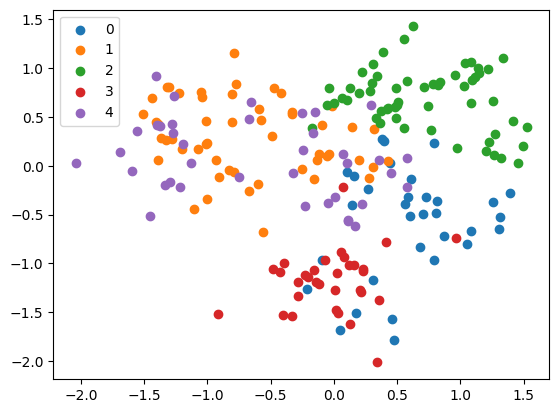

In [124]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
vec_pca = pca.fit_transform(country_df.dropna()['vec'].to_list())
for i in np.unique(clf.labels_):
    plt.scatter(x=vec_pca[np.where(clf.labels_==i)][:,0],y=vec_pca[np.where(clf.labels_==i)][:,1], label=i)
plt.legend()
plt.show()

## 68. Ward’s method clustering

Apply hierarchical clustering to the word vectors of the country names. Use Ward’s method for the distance metric between two clusters. Visualize the clustering result as the dendrogram.

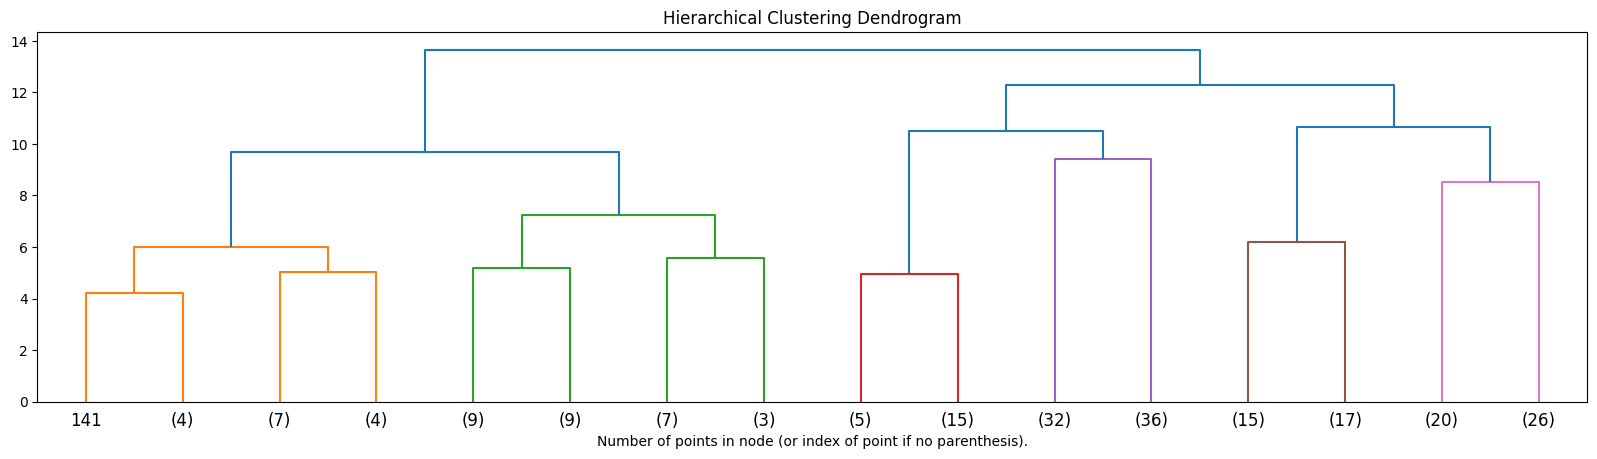

In [146]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

X = country_df.dropna()['vec'].to_list()
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.figure().set_figwidth(20)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 69. t-SNE Visualization

Visualize the word vector space of the country names by t-SNE.

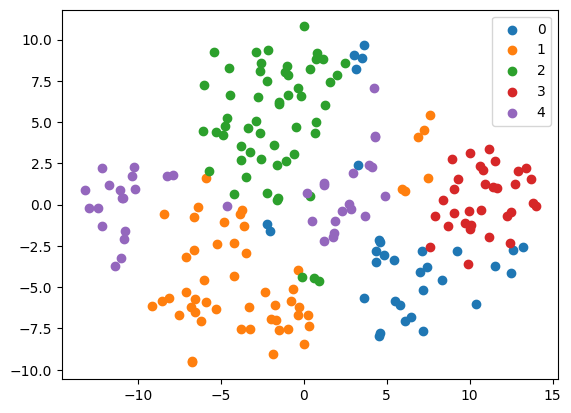

In [186]:
from sklearn.manifold import TSNE

vec = np.stack(country_df.dropna()['vec'])
X = TSNE(n_components=2, perplexity=40).fit_transform(vec)
for i in np.unique(clf.labels_):
    plt.scatter(x=X[np.where(clf.labels_==i)][:,0],y=X[np.where(clf.labels_==i)][:,1], label=i)
plt.legend()
plt.show()

# Chapter 8: Neural networks

In this chapter, we implement a neural network model for the text classification task. We then apply the model to the news classification dataset that we used in the chapter 6. You might want to use the deep learning frameworks such as PyTorch, TensorFlow, Chainer.

## 70. Generating Features through Word Vector Summation

Let us consider converting the dataset from the problem 50 to feature vectors.
For example, we want to create a matrix $X$ (sequence of feature vectors of all instances) and a vector $Y$ (sequence of gold labels of all instances).

$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$

Here, $n$ represents a number of instances in training data. $\boldsymbol{x}_i \in \mathbb{R}^d$ and $y_i \in \mathbb{N}$ represent $i \in {1,...,n}$-th feature vector and target (gold) label respectively.
Note that the task is to classify a given headline into one of the following four categories: "Business", "Science", "Entertainment" and "Health".
Let us define that $\mathbb{N}_4$ represents a natural number smaller than 4 (including zero).
Then a gold label of a given instance can be represented as $y_i \in \mathbb{N}_4$.
Let us also define that $L$ represents the number of labels (This time $L=4$).

A feature vector of $i$-th instance $\boldsymbol{x}_i$ is computed as follows: 

$
\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t}),
$

where $i$-th instance consists of $T_i$ tokens $(w_{i,1},...,w_{i,T_i})$ and $emb(w) \in \mathbb{R}^{d}$ represents a (size $d$) word vector corresponding word $w$.
In other words, $i$-th article headline is represented as an average of word vectors of all words in the headline.
For word embeddings, use pretrained word vector of dimension $300$ (i.e., $d=300$).

A gold label of $i$-th instance $y_i$ is defined as follows:

$
y_i = \begin{cases}
0 & (\text{if article }\boldsymbol{x}_i\text{ belongs to Business category}) \\
1 & (\text{if article }\boldsymbol{x}_i\text{ belongs to Science category}) \\
2 & (\text{if article }\boldsymbol{x}_i\text{ belongs to Entertainment category}) \\
3 & (\text{if article }\boldsymbol{x}_i\text{ belongs to Health category}) \\
\end{cases}
$

Note that you do not have to strictly follow the definition above as long as there exist one-to-one mappings between the name of the category and the label index.

Based on the specifications above, create the following matrices and vectors and save them into binary files:

+ Training data feature matrix: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
+ Training data label vector: $Y_{\rm train} \in \mathbb{N}^{N_t}$
+ Validation data feature matrix: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
+ Validation data label vector: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
+ Test data feature matrix: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
+ Test data label vector: $Y_{\rm test} \in \mathbb{N}^{N_e}$

Here, $N_t, N_v, N_e$ represent the number of instances in training data, validation data and test data, respectively.


In [93]:
import time
import pandas as pd
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset

emb_model = KeyedVectors.load_word2vec_format("nlp100-files/chapter8/GoogleNews-vectors-negative300.bin", binary=True)

In [2]:
def load_data_label(filename, folder_path):
    file_csv = pd.read_csv(f"{folder_path}/{filename}",sep="\t")
    label_df = file_csv['CATEGORY']
    data_df = file_csv['TITLE']
    return data_df,label_df

def convert_label(label):
    map_label = {
        "b":0,
        "t":1,
        "e":2,
        "m":3
    }
    return map_label[label]

def convert_emb(title, emb_model):
    words_arr = preprocess_string(title, [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords])
    res = []
    res = [emb_model[word] for word in words_arr if word in emb_model]
    res = np.mean(np.array(res),axis=0)
    return res

folder_path = "nlp100-files/chapter8"
train_data, train_label = load_data_label("train.txt",folder_path)
test_data, test_label = load_data_label("test.txt",folder_path)
val_data, val_label = load_data_label("val.txt",folder_path)

train_label = train_label.apply(convert_label)
test_label = test_label.apply(convert_label)
val_label = val_label.apply(convert_label)

train_data = train_data.apply(convert_emb, args=(emb_model,))
test_data = test_data.apply(convert_emb, args=(emb_model,))
val_data = val_data.apply(convert_emb, args=(emb_model,))


## 71. Building Single Layer Neural Network

Load matrices and vectors from the problem 70.
Compute the following operations on training data:

$
\hat{\boldsymbol{y}}_1 = {\rm softmax}(\boldsymbol{x}_1 W), \\
\hat{Y} = {\rm softmax}(X_{[1:4]} W)
$

Here, ${\rm softmax}$ refers to softmax function and $X_{[1:4]} \in \mathbb{R}^{4 \times d}$ is a vertical concatenation of $\boldsymbol{x}_1, \boldsymbol{x}_2, \boldsymbol{x}_3, \boldsymbol{x}_4$:

$
X_{[1:4]} = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \boldsymbol{x}_3 \\ 
  \boldsymbol{x}_4 \\ 
\end{pmatrix}
$

Matrix $W \in \mathbb{R}^{d \times L}$ is the weight of single-layer neural network.
You may randomly initialize the weight for now (we will update the parameter in later questions).
Note that $\hat{\boldsymbol{y}}_1 \in \mathbb{R}^L$ represents a probability distribution over the category.
Similarly, $\hat{Y} \in \mathbb{R}^{n \times L}$ represents a probability distribution of each instance in training data $x_1, x_2, x_3, x_4$.

In [3]:
torch_data = torch.tensor(train_data.head(4))
rand_weight = torch.randn(torch_data.shape[1],train_label.nunique(), requires_grad=True) 
print(F.softmax(torch.matmul(torch.tensor(train_data.head(1)),rand_weight),dim=1))
F.softmax(torch.matmul(torch_data,rand_weight), dim=1)

tensor([[0.1276, 0.2727, 0.5868, 0.0130]], grad_fn=<SoftmaxBackward0>)


/tmp/ipykernel_6155/1903679902.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch_data = torch.tensor(train_data.head(4))


tensor([[0.1276, 0.2727, 0.5868, 0.0130],
        [0.3395, 0.1692, 0.2677, 0.2237],
        [0.2992, 0.0497, 0.0738, 0.5773],
        [0.4721, 0.1093, 0.3827, 0.0359]], grad_fn=<SoftmaxBackward0>)

## 72. Calculating loss and gradients 

Calculate the cross-entropy loss and the gradients for the matrix $W$ on a training sample $x_1$ and a set of samples $x_1, x_2, x_3, x_4$. The loss on a single sample is calculated using the following formula: 

$
l_i = −\log[\text{probability that sample } x_i \text{ is classified as }y_i]
$

The cross-entropy loss for a set of samples is the average of the losses of each sample included in the set.


In [4]:
F.cross_entropy(torch.matmul(torch.tensor(train_data.head(1)), rand_weight), torch.tensor(train_label.head(1)))

tensor(2.0592, grad_fn=<NllLossBackward0>)

In [5]:
F.cross_entropy(torch.matmul(torch_data,rand_weight), torch.tensor(train_label.head(4)))

tensor(1.6767, grad_fn=<NllLossBackward0>)

## 73. Learning with stochastic gradient descent

Update the matrix $W$

using stochastic gradient descent (SGD). The training should be terminated with an appropriate criterion, for example, “stop after 100 epochs”.

In [38]:
train_data_tensor = torch.tensor(np.stack(train_data.to_numpy()))
train_label_tensor = torch.tensor(train_label.to_numpy())
test_data_tensor = torch.tensor(np.stack(test_data.to_numpy()))
test_label_tensor = torch.tensor(test_label.to_numpy())
val_data_tensor = torch.tensor(np.stack(val_data.to_numpy()))
val_label_tensor = torch.tensor(val_label.to_numpy())

In [65]:
init_weight = rand_weight.clone().detach().requires_grad_(True)
init_bias = torch.zeros(4, requires_grad=True)
optimizer = torch.optim.SGD((init_weight,init_bias))
criterion = torch.nn.CrossEntropyLoss()
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = torch.matmul(train_data_tensor, init_weight)
    loss = criterion(outputs, train_label_tensor)
    loss.backward()
    optimizer.step()

    if epoch%10 == 0:
        print(f"Loss {epoch}: {loss}")

Loss 0: 1.9150511026382446
Loss 10: 1.9133509397506714
Loss 20: 1.9116545915603638
Loss 30: 1.9099622964859009
Loss 40: 1.9082739353179932
Loss 50: 1.9065899848937988
Loss 60: 1.9049099683761597
Loss 70: 1.9032341241836548
Loss 80: 1.9015624523162842
Loss 90: 1.8998947143554688


In [66]:
class LinearModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Linear(300,4)
    def forward(self, x):
        return self.linear(x)

model = LinearModel()
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(train_data_tensor)
    loss = criterion(outputs, train_label_tensor)
    loss.backward()
    optimizer.step()

    if epoch%10 == 0:
        print(f"Loss {epoch}: {loss}")

Loss 0: 1.385779619216919
Loss 10: 1.38363516330719
Loss 20: 1.3815052509307861
Loss 30: 1.3793898820877075
Loss 40: 1.377288818359375
Loss 50: 1.3752020597457886
Loss 60: 1.3731293678283691
Loss 70: 1.3710707426071167
Loss 80: 1.369025707244873
Loss 90: 1.3669947385787964


## 74. Measuring accuracy

Find the classification accuracy over both the training and evaluation data using the matrix obtained in the problem 73.

In [67]:
def manual_pred(X,y,weight,bias):
    w_mul_data = torch.matmul(X, weight)
    w_bias = torch.add(w_mul_data, bias)
    pred_proba = F.softmax(w_bias, dim=1)
    pred = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(y,pred))/y.shape[0]
    return acc
train_acc = manual_pred(train_data_tensor, train_label_tensor, init_weight, init_bias)
print(f"Train Accuracy: {train_acc*100:.2f}%")
val_acc = manual_pred(val_data_tensor,val_label_tensor,init_weight,init_bias)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

Train Accuracy: 27.31%
Validation Accuracy: 27.29%


In [44]:
def model_pred(X,y,model):
    model.eval()
    w_bias = model(X)
    pred_proba = F.softmax(w_bias, dim=1)
    pred = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(y,pred))/y.shape[0]
    return acc
train_acc = model_pred(train_data_tensor, train_label_tensor,model)
print(f"Train Accuracy: {train_acc*100:.2f}%")
val_acc = model_pred(val_data_tensor,val_label_tensor,model)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

Train Accuracy: 40.60%
Validation Accuracy: 40.55%


## 75. Plotting loss and accuracy

Modify the code from the problem 73 so that the loss and accuracy of both the training and the evaluation data are plotted on a graph after each epoch. Use this graph to monitor the progress of learning.

In [68]:
class LinearModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Linear(300,4)
    def forward(self, x):
        x = self.linear(x)
        return x

model = LinearModel()
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 300
losses, accs = [],[]

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(train_data_tensor)
    loss = criterion(outputs, train_label_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    pred_proba = F.softmax(model(train_data_tensor),dim=1)
    preds = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(train_label_tensor,preds))/train_label_tensor.shape[0]
    
    losses.append(loss.detach().numpy())
    accs.append(acc.detach().numpy())

    # if epoch%10 == 0:
    #     print(f"Epoch {epoch} ==> Loss: {loss:.3f}, Accuracy: {acc:.3f}")
    
analysis_df = pd.DataFrame({"loss":losses,"accuracy":accs}).astype(float)
analysis_df

,loss,accuracy
0,1.376910,0.362631
1,1.376705,0.363475
2,1.376499,0.364599
3,1.376294,0.366286
4,1.376088,0.367035
...,...,...
295,1.321784,0.502249
296,1.321615,0.502343
297,1.321445,0.502624
298,1.321276,0.502811


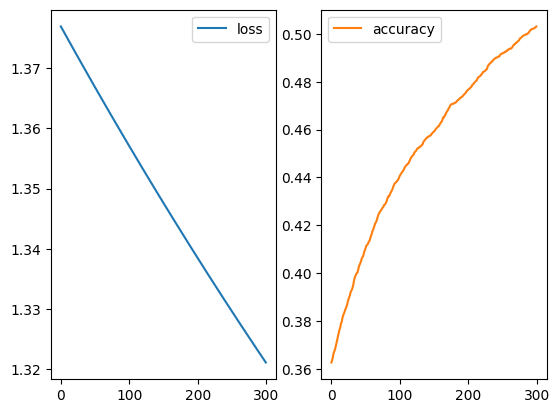

In [73]:
analysis_df.plot(kind='line', subplots=True, layout=(1,2))
plt.show()

## 76. Checkpoints

Modify the code from the problem 75 to write out checkpoints to a file after each epoch. Checkpoints should include values of the parameters such as weight matrices and the internal states of the optimization algorithm.

In [74]:
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 300
losses, accs = [],[]

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(train_data_tensor)
    loss = criterion(outputs, train_label_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    pred_proba = F.softmax(model(train_data_tensor),dim=1)
    preds = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(train_label_tensor,preds))/train_label_tensor.shape[0]
    
    losses.append(loss.detach().numpy())
    accs.append(acc.detach().numpy())

    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": loss,
        "accuracy": acc
    }, f"{folder_path}/checkpoint.pt")

    # if epoch%10 == 0:
    #     print(f"Epoch {epoch} ==> Loss: {loss:.3f}, Accuracy: {acc:.3f}")

## 77. Mini-batches

Modify the code from the problem 76 to calculate the loss/gradient and update the values of matrix $W$ for every $B$ samples (mini-batch). Compare the time required for one learning epoch by changing the value of $B$ to $1, 2, 4, 8, \dots$.

In [86]:
class NewsDataset(Dataset):
    def __init__(self, data,label) -> None:
        super().__init__()
        self.data = data
        self.labels = label
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, index):
        row = self.data[index]
        row_label = self.labels[index]
        return row,row_label 

In [96]:
batch_dur = {
    "1":[],
    "2":[],
    "4":[],
    "8":[],
    "64":[]
}
b_size = 1
train_dataloader = DataLoader(NewsDataset(train_data_tensor,train_label_tensor), batch_size=b_size, shuffle=True)
test_dataloader = DataLoader(NewsDataset(test_data_tensor,test_label_tensor), batch_size=b_size, shuffle=True)
val_dataloader = DataLoader(NewsDataset(val_data_tensor,val_label_tensor), batch_size=b_size, shuffle=True)

In [106]:
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 100
losses, accs = [],[]

for epoch in range(epochs):
    start_time = time.time()
    batch_loss = []
    for x,y in train_dataloader:
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        batch_loss.append(loss)

    end_time = time.time()

    batch_dur[str(b_size)].append(end_time - start_time)

    model.eval()
    pred_proba = F.softmax(model(train_data_tensor),dim=1)
    preds = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(train_label_tensor,preds))/train_label_tensor.shape[0]
    
    losses.append(torch.mean(torch.tensor(batch_loss)).detach().numpy())
    accs.append(acc.detach().numpy())

    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": loss,
        "accuracy": acc
    }, f"{folder_path}/checkpoint.pt")

    # if epoch%10 == 0:
    #     print(f"Epoch {epoch} ==> Loss: {loss:.3f}, Accuracy: {acc:.3f}")

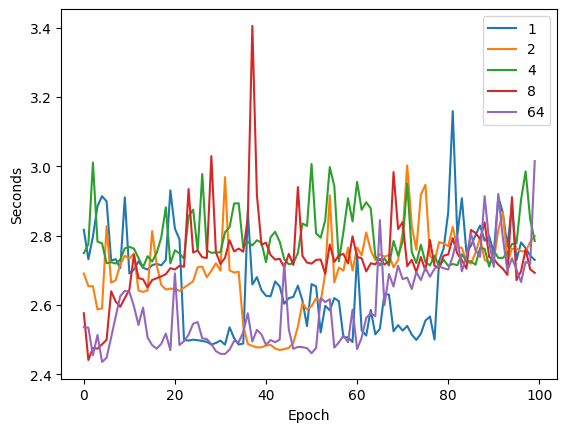

In [113]:
pd.DataFrame(batch_dur).plot(kind="line")
plt.xlabel("Epoch")
plt.ylabel("Seconds")
plt.show()

## 78. Training on a GPU

Modify the code from the problem 77 so that it runs on a GPU.

In [114]:
b_size = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
train_dataloader = DataLoader(NewsDataset(train_data_tensor,train_label_tensor), batch_size=b_size, shuffle=True)
test_dataloader = DataLoader(NewsDataset(test_data_tensor,test_label_tensor), batch_size=b_size, shuffle=True)
val_dataloader = DataLoader(NewsDataset(val_data_tensor,val_label_tensor), batch_size=b_size, shuffle=True)

cuda:0


In [117]:
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 300
losses, accs = [],[]

for epoch in range(epochs):
    batch_loss = []
    model.to(device)
    for x,y in train_dataloader:
        x,y = x.to(device),y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        batch_loss.append(loss)

    model.eval()
    pred_proba = F.softmax(model(train_data_tensor.to(device)),dim=1)
    preds = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(train_label_tensor.to(device),preds))/train_label_tensor.to(device).shape[0]
    
    losses.append(torch.mean(torch.tensor(batch_loss)).detach().cpu().numpy())
    accs.append(acc.detach().cpu().numpy())

    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": loss,
        "accuracy": acc
    }, f"{folder_path}/checkpoint.pt")

    if epoch%30 == 0:
        print(f"Epoch {epoch} ==> Loss: {loss:.3f}, Accuracy: {acc:.3f}")

Epoch 0 ==> Loss: 1.354, Accuracy: 0.323
Epoch 30 ==> Loss: 1.055, Accuracy: 0.761
Epoch 60 ==> Loss: 0.884, Accuracy: 0.765
Epoch 90 ==> Loss: 0.835, Accuracy: 0.767
Epoch 120 ==> Loss: 0.773, Accuracy: 0.768
Epoch 150 ==> Loss: 0.912, Accuracy: 0.769
Epoch 180 ==> Loss: 0.739, Accuracy: 0.769
Epoch 210 ==> Loss: 0.704, Accuracy: 0.771
Epoch 240 ==> Loss: 0.606, Accuracy: 0.772
Epoch 270 ==> Loss: 0.658, Accuracy: 0.775


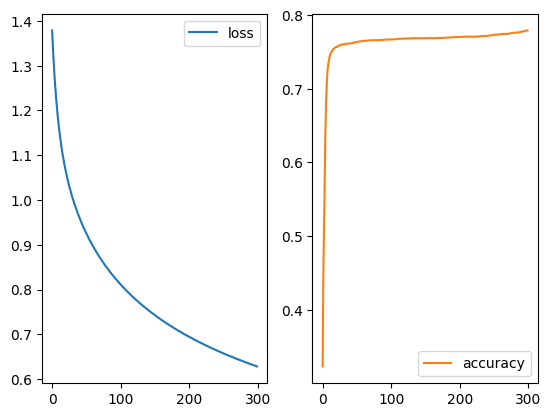

In [118]:
pd.DataFrame({"loss":losses,"accuracy":accs}).astype(float).plot(kind='line', subplots=True, layout=(1,2))
plt.show()

## 79. Multilayer Neural Networks

Modify the code from the problem 78 to create a high-performing classifier by changing the architecture of the neural network. Try introducing bias terms and multiple layers.
.

In [119]:
class MultiLayerModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear1 = nn.Linear(300,100)
        self.linear2 = nn.Linear(100, 50)
        self.linear3 = nn.Linear(50,4)
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

model = MultiLayerModel()
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 300
losses, accs = [],[]

for epoch in range(epochs):
    batch_loss = []
    model.to(device)
    for x,y in train_dataloader:
        x,y = x.to(device),y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        batch_loss.append(loss)

    model.eval()
    pred_proba = F.softmax(model(train_data_tensor.to(device)),dim=1)
    preds = torch.argmax(pred_proba,dim=1)
    acc = torch.sum(torch.eq(train_label_tensor.to(device),preds))/train_label_tensor.to(device).shape[0]
    
    losses.append(torch.mean(torch.tensor(batch_loss)).detach().cpu().numpy())
    accs.append(acc.detach().cpu().numpy())

    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": loss,
        "accuracy": acc
    }, f"{folder_path}/checkpoint.pt")

    if epoch%30 == 0:
        print(f"Epoch {epoch} ==> Loss: {loss:.3f}, Accuracy: {acc:.3f}")

Epoch 0 ==> Loss: 1.304, Accuracy: 0.441
Epoch 30 ==> Loss: 1.080, Accuracy: 0.741
Epoch 60 ==> Loss: 0.896, Accuracy: 0.764
Epoch 90 ==> Loss: 0.746, Accuracy: 0.772
Epoch 120 ==> Loss: 0.682, Accuracy: 0.778
Epoch 150 ==> Loss: 0.423, Accuracy: 0.782
Epoch 180 ==> Loss: 0.583, Accuracy: 0.791
Epoch 210 ==> Loss: 0.335, Accuracy: 0.807
Epoch 240 ==> Loss: 0.439, Accuracy: 0.828
Epoch 270 ==> Loss: 0.470, Accuracy: 0.841


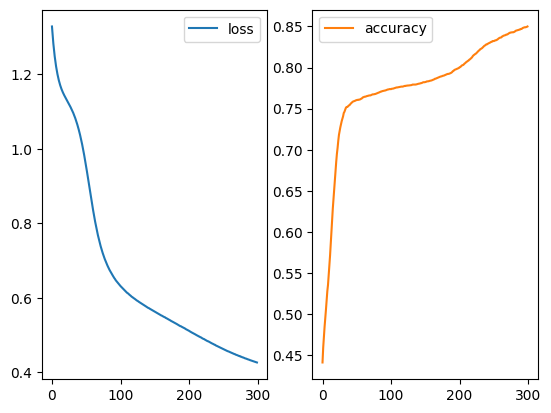

In [120]:
pd.DataFrame({"loss":losses,"accuracy":accs}).astype(float).plot(kind='line', subplots=True, layout=(1,2))
plt.show()

In [122]:
test_acc = model_pred(test_data_tensor.to(device),test_label_tensor.to(device),model)
test_acc = test_acc.detach().cpu()
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 84.86%


# Chapter 9: RNN and CNN


## 80. Turning words into numeric IDs
We want to turn the words from the data we created in problem 51 into numeric IDs. 
Assign to each word that occurs twice or more in data a numeric ID, so that the most frequent word is assigned the ID `1`, the second-most frequent word the ID `2`, and so on. 
Then, implement a function that returns the ID for a given word, or, if the word occurs less than two times in the data, returns `0`.

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset

In [2]:
def get_vocab_dict(df):
    temp_df = df.apply(lambda x: x.sum(),axis=0)
    temp_df = temp_df[temp_df >= 2].sort_values(ascending=False)
    words_dict = {word:idx+1 for idx, word in enumerate(temp_df.index)}
    return words_dict
def convert_to_seq(row,vocab):
    word_sample = row[row > 0]
    seq_sample = [vocab[word] if word in vocab else 0 for word in word_sample.index ]
    seq_sample = seq_sample+ [0]*(len(vocab)-len(seq_sample))
    return seq_sample

train_df = pd.read_csv("nlp100-files/chapter9/train_feature.csv")
train_label = pd.read_csv("nlp100-files/chapter9/train_label.csv")['CATEGORY']
test_df = pd.read_csv("nlp100-files/chapter9/test_feature.csv")
test_label = pd.read_csv("nlp100-files/chapter9/test_label.csv")['CATEGORY']
val_df = pd.read_csv("nlp100-files/chapter9/val_feature.csv")
val_label = pd.read_csv("nlp100-files/chapter9/val_label.csv")['CATEGORY']

vocab_dict = get_vocab_dict(train_df)

train_df = train_df.apply(convert_to_seq, axis=1,args=(vocab_dict,))
test_df = test_df.apply(convert_to_seq, axis=1,args=(vocab_dict,))
val_df = val_df.apply(convert_to_seq, axis=1,args=(vocab_dict,))

In [3]:
vocab_dict

{'update': 1,
 'new': 2,
 'stocks': 3,
 'china': 4,
 'kardashian': 5,
 'say': 6,
 'euro': 7,
 'kim': 8,
 'rise': 9,
 'data': 10,
 'year': 11,
 'dollar': 12,
 'ecb': 13,
 'day': 14,
 'share': 15,
 'fed': 16,
 'bank': 17,
 'deal': 18,
 'high': 19,
 'fall': 20,
 'says': 21,
 'profit': 22,
 'forex': 23,
 'wall': 24,
 'low': 25,
 'global': 26,
 'star': 27,
 'cyrus': 28,
 'miley': 29,
 'billion': 30,
 'rate': 31,
 'month': 32,
 'time': 33,
 'ceo': 34,
 'west': 35,
 'sale': 36,
 'week': 37,
 'st': 38,
 'million': 39,
 'buy': 40,
 'set': 41,
 'report': 42,
 'video': 43,
 'growth': 44,
 'google': 45,
 'chris': 46,
 'ukraine': 47,
 'kanye': 48,
 'drop': 49,
 'home': 50,
 'justin': 51,
 'hit': 52,
 'bieber': 53,
 'gain': 54,
 'wedding': 55,
 'pay': 56,
 'oil': 57,
 'record': 58,
 'bln': 59,
 'apple': 60,
 'gm': 61,
 'end': 62,
 'uk': 63,
 '2014': 64,
 'stock': 65,
 'markets': 66,
 'make': 67,
 'gold': 68,
 'near': 69,
 'inflation': 70,
 'cut': 71,
 'market': 72,
 'movie': 73,
 'york': 74,
 'econo

## 81. Prediction with an RNN
We have a sequence of numeric word IDs $\boldsymbol{x} = (x_1, x_2, \dots, x_T)$, corresponding to the words in a given sentence. 
Here, $T$ is the number of words in the sequence (i.e., the sentence) and $x_t \in \mathbb{R}^{V}$ is a one-hot vector ($V$ is the number of words in the vocabulary).
Use an RNN (Recurrent Neural Network) to implement a model that predicts a category $y$ from a given sequence of word IDs $\boldsymbol{x}$.

$$
\overrightarrow{h}_0 = 0, \\
\overrightarrow{h}_t = {\rm \overrightarrow{RNN}}(\mathrm{emb}(x_t), \overrightarrow{h}_{t-1}), \\
y = {\rm softmax}(W^{(yh)} \overrightarrow{h}_T + b^{(y)}),
$$

where $\mathrm{emb}(x) \in \mathbb{R}^{d_w}$ is a word embedding (a function that maps a one-hot vector to a dense word vector).
Here, $\overrightarrow{h}_t \in \mathbb{R}^{d_h}$ is the hidden state at time step $t$.
In addition, ${\rm \overrightarrow{RNN}}(x,h)$ is an RNN cell that 

1. takes as input the word at timestep $t$ and the hidden state of the previous time step, and 
2. produces the hidden state for the next time step. $W^{(yh)} \in \mathbb{R}^{L \times d_h}$ is a linear transformation for predicting the category from the hidden state, and $b^{(y)} \in \mathbb{R}^{L}$ is a bias term ($d_w$, $d_h$ and $L$ are the dimensionalities of the word embeddings, hidden state, and the number of categories respectively).
While there are several different RNN cells ${\rm \overrightarrow{RNN}}(x,h)$, a simple example is as follows:

$$
{\rm \overrightarrow{RNN}}(x,h) = g(W^{(hx)} x + W^{(hh)}h + b^{(h)}),
$$

where $W^{(hx)} \in \mathbb{R}^{d_h \times d_w}，W^{(hh)} \in \mathbb{R}^{d_h \times d_h}, b^{(h)} \in \mathbb{R}^{d_h}$ are the parameters of the RNN cell, and $g$ is an activation function （e.g. $\tanh$ and ReLU).

For this problem, you don't have to train the model.
You only need to randomly initialize the network and compute $y$.
For the dimentionalities, use the settings like $d_w = 300, d_h=50$ (same applies for the later questions).

In [4]:
class RNNModel(nn.Module):
    def __init__(self,vocab) -> None:
        super().__init__()
        self.embed = nn.Embedding(num_embeddings=len(vocab),embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=50)
        self.lin = nn.Linear(in_features=50,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[-1]
        x = self.actv(x)
        x = self.lin(x)
        x = self.softmax(x)
        return x

seq_sample = test_df.iloc[0]
model = RNNModel(vocab=vocab_dict)
pred_proba = model(torch.tensor(seq_sample))
pred = torch.max(pred_proba)
pred

tensor(0.3272, grad_fn=<MaxBackward1>)

## 82. Training with Stochastic Gradient Descent

Use Stochastic Gradient Descent (SGD) to train the model we built in Problem 81.
During training, print the training loss and training accuracy, and loss and accuracy on validation data.
Stop training according to the appropriate criterion (e.g., after 10 epochs).

In [4]:
def convert_label(label):
    map_label = {
        "b":0,
        "t":1,
        "e":2,
        "m":3
    }
    return map_label[label]

train_df_tensor = torch.tensor(train_df)
test_df_tensor = torch.tensor(test_df)
val_df_tensor = torch.tensor(val_df)

train_label_tensor = torch.tensor(train_label.apply(convert_label))
test_label_tensor = torch.tensor(test_label.apply(convert_label))
val_label_tensor = torch.tensor(val_label.apply(convert_label))

In [6]:
class RNNModel(nn.Module):
    def __init__(self,vocab) -> None:
        super().__init__()
        self.embed = nn.Embedding(num_embeddings=len(vocab),embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=50,batch_first=True)
        self.lin = nn.Linear(in_features=50,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[0]
        x = self.actv(x)
        x = self.lin(x[:,-1,:])
        # x = self.softmax(x)
        return x

model = RNNModel(vocab_dict)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 100
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

train_df_sample = train_df_tensor[:51]
val_df_sample = val_df_tensor[:21]
train_label_sample = train_label_tensor[:51]
val_label_sample = val_label_tensor[:21]

for epoch in range(epochs):
    optimizer.zero_grad()
    train_outputs = model(train_df_sample)
    train_loss = criterion(train_outputs, train_label_sample)
    val_outputs = model(val_df_sample)
    val_loss = criterion(val_outputs, val_label_sample)
    train_loss.backward()
    optimizer.step()

    model.eval()
    train_pred_proba = F.softmax(model(train_df_sample),dim=1)
    val_pred_proba = F.softmax(model(val_df_sample),dim=1)
    train_preds = torch.argmax(train_pred_proba,dim=1)
    val_preds = torch.argmax(val_pred_proba,dim=1)
    train_acc = torch.sum(torch.eq(train_label_sample,train_preds))/train_label_sample.shape[0]
    val_acc = torch.sum(torch.eq(val_label_sample,val_preds))/val_label_sample.shape[0]
    
    losses['train'].append(train_loss.detach().numpy())
    losses['val'].append(val_loss.detach().numpy())
    accs['train'].append(train_acc.detach().numpy())
    accs['val'].append(val_acc.detach().numpy())

    if epoch%10 == 0:
        print(f"Epoch {epoch} ==> Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.3f} || Val Loss: {val_loss:.3f}, Val Acc: {val_acc:.3f}")

Epoch 0 ==> Train Loss: 1.338, Train Acc: 0.490 || Val Loss: 1.295, Val Acc: 0.524
Epoch 10 ==> Train Loss: 1.315, Train Acc: 0.490 || Val Loss: 1.277, Val Acc: 0.524
Epoch 20 ==> Train Loss: 1.295, Train Acc: 0.490 || Val Loss: 1.262, Val Acc: 0.524
Epoch 30 ==> Train Loss: 1.280, Train Acc: 0.490 || Val Loss: 1.252, Val Acc: 0.524
Epoch 40 ==> Train Loss: 1.268, Train Acc: 0.490 || Val Loss: 1.244, Val Acc: 0.524
Epoch 50 ==> Train Loss: 1.258, Train Acc: 0.490 || Val Loss: 1.236, Val Acc: 0.524
Epoch 60 ==> Train Loss: 1.249, Train Acc: 0.490 || Val Loss: 1.230, Val Acc: 0.524
Epoch 70 ==> Train Loss: 1.241, Train Acc: 0.490 || Val Loss: 1.224, Val Acc: 0.524
Epoch 80 ==> Train Loss: 1.234, Train Acc: 0.490 || Val Loss: 1.220, Val Acc: 0.524
Epoch 90 ==> Train Loss: 1.228, Train Acc: 0.490 || Val Loss: 1.215, Val Acc: 0.524



## 83. Mini-batch Training, GPU Training

Modify the code from Problem 82 so that it computes loss and gradient for a batch of instances. 
You may decide mini-batch size $B$ (e.g., $B=32$).
After this, train the model on a GPU.

In [3]:
folder_path = "nlp100-files/chapter9"

In [6]:
class NewsDataset(Dataset):
    def __init__(self, data,label) -> None:
        super().__init__()
        self.data = data
        self.labels = label
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, index):
        row = self.data[index]
        row_label = self.labels[index]
        return row,row_label 
class RNNModel(nn.Module):
    def __init__(self,vocab) -> None:
        super().__init__()
        self.embed = nn.Embedding(num_embeddings=len(vocab)+1,embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=50,batch_first=True)
        self.lin = nn.Linear(in_features=50,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[0]
        x = self.actv(x)
        x = self.lin(x[:,-1,:])
        # x = self.softmax(x)
        return x

b_size = 16
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
train_dataloader = DataLoader(NewsDataset(train_df_tensor,train_label_tensor), batch_size=b_size, shuffle=True)
test_dataloader = DataLoader(NewsDataset(test_df_tensor,test_label_tensor), batch_size=b_size, shuffle=True)
val_dataloader = DataLoader(NewsDataset(val_df_tensor,val_label_tensor), batch_size=b_size, shuffle=True)

cuda:0


In [14]:
model = RNNModel(vocab_dict).to(device)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

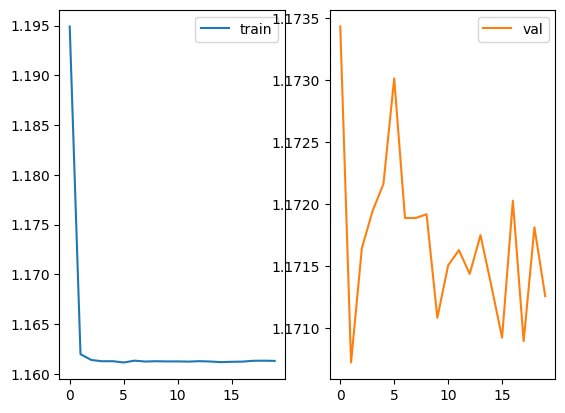

In [16]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

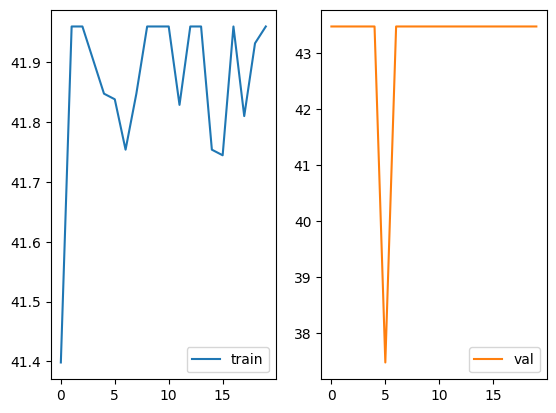

In [17]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

## 84. Add Pretrained Word Embeddings

Use pretrained word embeddings (e.g., the [Google News embeddings](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing), which have been trained on approx. 100 billion tokens) to initialize $\mathrm{emb}(x)$ and train the model.

In [7]:
from gensim.models.keyedvectors import KeyedVectors
emb_model = KeyedVectors.load_word2vec_format("nlp100-files/chapter7/GoogleNews-vectors-negative300.bin", binary=True)

In [8]:
class RNNModel(nn.Module):
    def __init__(self,vocab,pretrain_emb=None) -> None:
        super().__init__()
        if pretrain_emb:
            weight = torch.FloatTensor(np.array([pretrain_emb[word] if word in pretrain_emb else np.zeros((300,)) for word in vocab_dict]))
            weight = torch.cat((weight,torch.zeros((1,300))))
            self.embed = nn.Embedding.from_pretrained(weight)
        else:
            self.embed = nn.Embedding(num_embeddings=len(vocab)+1,embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=50,batch_first=True)
        self.lin = nn.Linear(in_features=50,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[0]
        x = self.actv(x)
        x = self.lin(x[:,-1,:])
        # x = self.softmax(x)
        return x

In [9]:
model = RNNModel(vocab_dict,emb_model).to(device)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

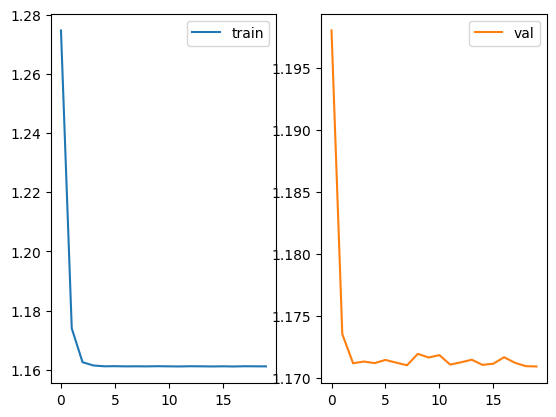

In [10]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

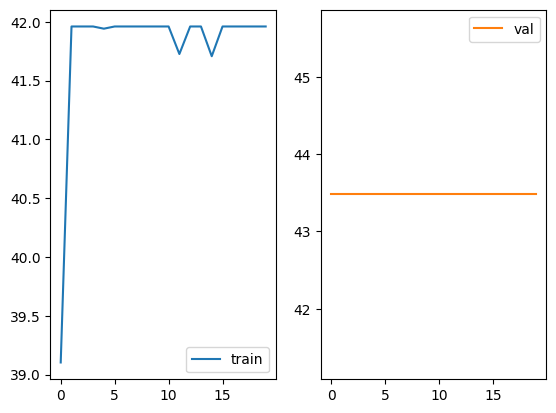

In [11]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

## 85. Bi-directional RNN and Multi-layer RNN

Encode the input text using both forward and backward RNNs and train the model.

$$
\overleftarrow{h}_{T+1} = 0, \\
\overleftarrow{h}_t = {\rm \overleftarrow{RNN}}(\mathrm{emb}(x_t), \overleftarrow{h}_{t+1}), \\
y = {\rm softmax}(W^{(yh)} [\overrightarrow{h}_T; \overleftarrow{h}_1] + b^{(y)})
$$

However，$\overrightarrow{h}_t \in \mathbb{R}^{d_h}, \overleftarrow{h}_t \in \mathbb{R}^{d_h}$ is the hidden state vector at time $t$ obtained by the forward and backward RNNs, and ${\rm \overleftarrow{RNN}}(x,h)$ is the RNN unit that calculates the previous state from the input $x$ and the hidden state $h$ at the next time, $W^{(yh)} \in \mathbb{R}^{L \times 2d_h}$ is a matrix for predicting categories from the hidden state vector, and $b^{(y)} \in \mathbb{R}^{L}$ is the bias term. 
Moreover，$[a; b]$ represents a concatenation of two vectors $a$ and $b$.

In addition, experiment with multi-layered bidirectional RNNs.


In [17]:
class BiRNNModel(nn.Module):
    def __init__(self,vocab,pretrain_emb=None) -> None:
        super().__init__()
        if pretrain_emb:
            weight = torch.FloatTensor(np.array([pretrain_emb[word] if word in pretrain_emb else np.zeros((300,)) for word in vocab_dict]))
            weight = torch.cat((weight,torch.zeros((1,300))))
            self.embed = nn.Embedding.from_pretrained(weight)
        else:
            self.embed = nn.Embedding(num_embeddings=len(vocab)+1,embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=50,batch_first=True, bidirectional=True)
        self.lin = nn.Linear(in_features=50*2,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[0]
        x = self.actv(x)
        x = self.lin(x[:,-1,:])
        # x = self.softmax(x)
        return x

In [18]:
model = BiRNNModel(vocab_dict).to(device)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

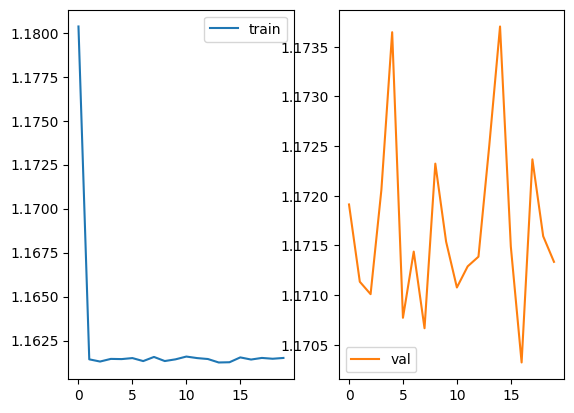

In [19]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

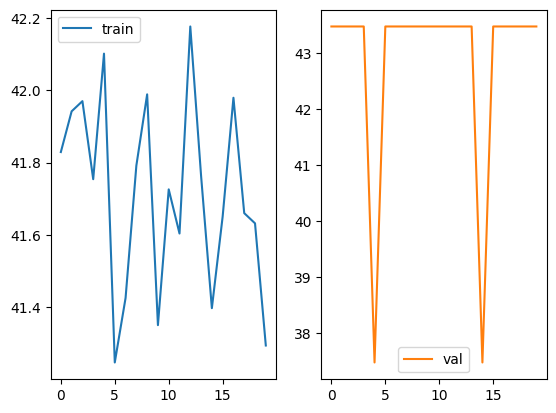

In [20]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

In [21]:
class BiRNNModel(nn.Module):
    def __init__(self,vocab,pretrain_emb=None) -> None:
        super().__init__()
        if pretrain_emb:
            weight = torch.FloatTensor(np.array([pretrain_emb[word] if word in pretrain_emb else np.zeros((300,)) for word in vocab_dict]))
            weight = torch.cat((weight,torch.zeros((1,300))))
            self.embed = nn.Embedding.from_pretrained(weight)
        else:
            self.embed = nn.Embedding(num_embeddings=len(vocab)+1,embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=50,batch_first=True, bidirectional=True,num_layers=2)
        self.lin = nn.Linear(in_features=50*2,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[0]
        x = self.actv(x)
        x = self.lin(x[:,-1,:])
        # x = self.softmax(x)
        return x

In [22]:
model = BiRNNModel(vocab_dict).to(device)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

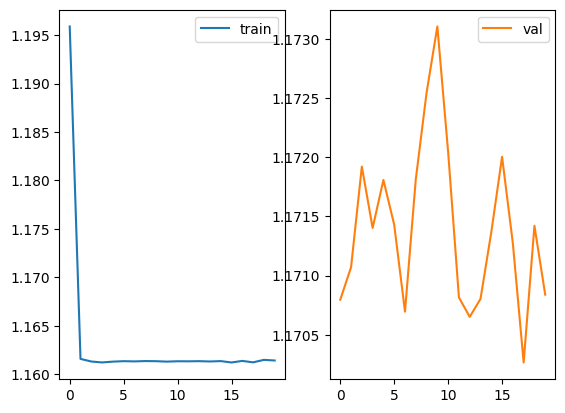

In [23]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

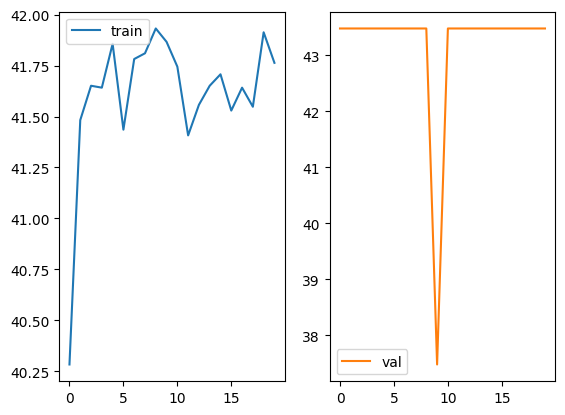

In [24]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

## 86. Convolutional Neural Networks (CNN)

Let us consider the sequence of words $\boldsymbol{x} = (x_1, x_2, \dots, x_T)$. 
Here, $T$ is the length of the word.
In addition, $x_t \in \mathbb{R}^{V}$ is one-hot vector that represents the ID that corresponds to the word ($V$ is the total number of words). 

Implement a model that predicts category $y$ from the given sequence $x$ using a Convolutional Neural Network (CNN).

The configuration of the CNN is as follows:

+ Word embedding dimension: $d_w$
+ Convolution filter size: 3 tokens
+ Convolution stride: 1 token
+ Convolution padding: Yes
+ The size of the vector of each time step after convolution operation: $d_h$
+ Apply max pooling after convolution operation and express input sentences as $d_h$-dimensional hidden vector.

That is, the feature vector $p_t \in \mathbb{R}^{d_h}$ at time $t$ is expressed via the following equation:

$
p_t = g(W^{(px)} [\mathrm{emb}(x_{t-1}); \mathrm{emb}(x_t); \mathrm{emb}(x_{t+1})] + b^{(p)})
$

Here, $W^{(px)} \in \mathbb{R}^{d_h \times 3d_w}$, $b^{(p)} \in \mathbb{R}^{d_h}$ is a CNN parameter, $g$ is the activation function (e.g., $\tanh$, ReLU, etc.), $[a; b; c]$ is the concatenation of vectors $a,b,c$. The reason why the number of columns in matrix $W^{(px)}$ is $3d_w$ is to perform a linear transformation on the concatenation of word embeddings for the 3 tokens.

In max pooling, the maximum value at all times is taken for each dimension of the feature vector, and the feature vector $c \in \mathbb{R}^{d_h}$ of the input document is obtained. Assuming that $c[i]$ represents the $i$-th dimension of vector $c$, max pooling is given by the following equation:

$$
c[i] = \max_{1 \leq t \leq T} p_t[i]
$$

Lastly, predict category $y$ by using both linear transformation and softmax function with matrix $W^{(yc)} \in \mathbb{R}^{L \times d_h}$ and bias $b^{(y)} \in \mathbb{R}^{L}$ applied to the input document's feature vector: 

$$
y = {\rm softmax}(W^{(yc)} c + b^{(y)})
$$

Moreover, it is fine to calculate $y$ with a randomly initialized weight matrix without learning the model.

In [51]:
class CNNModel(nn.Module):
    def __init__(self,vocab,pretrain_emb=None) -> None:
        super().__init__()
        if pretrain_emb:
            weight = torch.FloatTensor(np.array([pretrain_emb[word] if word in pretrain_emb else np.zeros((300,)) for word in vocab_dict]))
            weight = torch.cat((weight,torch.zeros((1,300))))
            self.embed = nn.Embedding.from_pretrained(weight)
        else:
            self.embed = nn.Embedding(num_embeddings=len(vocab)+1,embedding_dim=300)
        self.cnn = nn.Conv1d(in_channels=len(vocab), out_channels=50, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=3,stride=1,padding=1)
        self.lin = nn.Linear(in_features=50,out_features=4)
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.cnn(x)
        x = self.pool(x)
        x = x[:,:,-1]
        x = self.lin(x)
        # x = self.softmax(x)
        return x

In [52]:
model = CNNModel(vocab_dict).to(device)
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

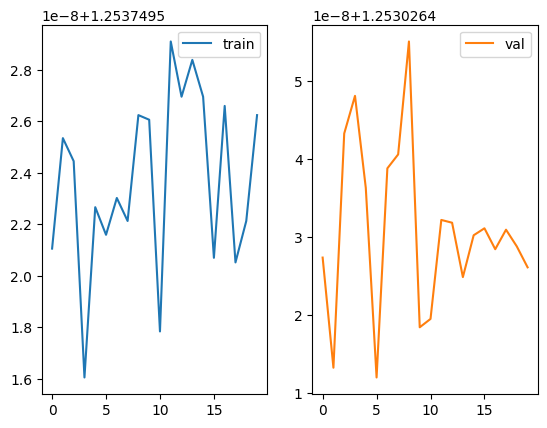

In [53]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

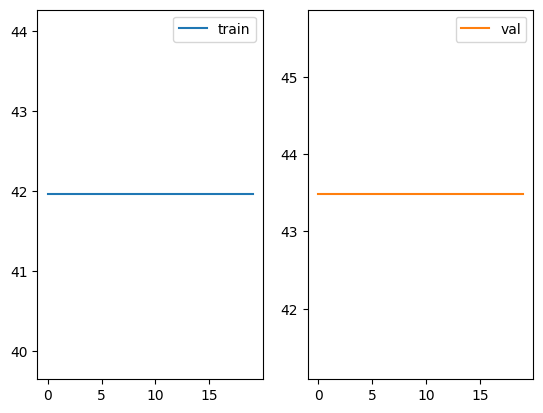

In [54]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

## 87. CNN Learning via Stochastic Gradient Descent

Using Stochastic Gradient Descent (SGD), learn the model you constructed in Problem 86．Learn the model while displaying the loss and correct rate on the training data and the loss and correct rate on the evaluation data. Finish with a suitable standard (e.g., 10 epochs, etc.).

In [55]:
model = CNNModel(vocab_dict).to(device)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

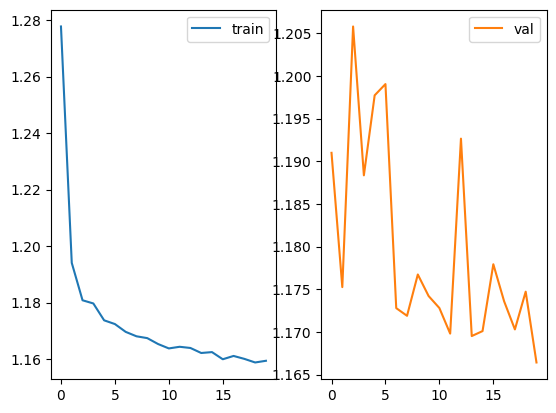

In [56]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

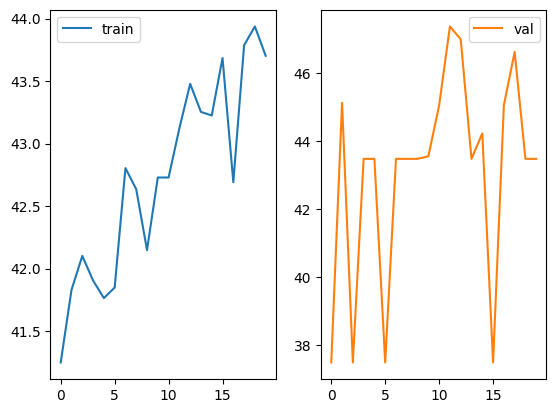

In [57]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

## 88. Hyper-parameter Tuning

Altering Problem 85 or 87's code, build a high-quality category classifier by adjusting the neural network's shape and hyper-parameters.

In [58]:
class RNNModel(nn.Module):
    def __init__(self,vocab,pretrain_emb=None) -> None:
        super().__init__()
        if pretrain_emb:
            weight = torch.FloatTensor(np.array([pretrain_emb[word] if word in pretrain_emb else np.zeros((300,)) for word in vocab_dict]))
            weight = torch.cat((weight,torch.zeros((1,300))))
            self.embed = nn.Embedding.from_pretrained(weight)
        else:
            self.embed = nn.Embedding(num_embeddings=len(vocab)+1,embedding_dim=300)
        self.rnn = nn.RNN(input_size=300,hidden_size=100,batch_first=True)
        self.lin = nn.Linear(in_features=100,out_features=4)
        self.actv = nn.ReLU()
        self.vocab = vocab
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embed(x)
        x = self.rnn(x)[0]
        x = self.actv(x)
        x = self.lin(x[:,-1,:])
        # x = self.softmax(x)
        return x

In [59]:
model = RNNModel(vocab_dict,emb_model).to(device)
optimizer = torch.optim.SGD(model.parameters())
criterion = torch.nn.CrossEntropyLoss()
epochs = 20
losses, accs = {"train":[],"val":[]},{"train":[],"val":[]}

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    running_total = 0
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()    
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        running_total += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

    # Calculate the training loss and training accuracy
    train_loss = running_loss / len(train_dataloader.dataset)
    train_acc = 100 * running_corrects / running_total

    # evaluate on the validation set
    correct = 0
    total = 0
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for vectors, labels in val_dataloader:
            vectors = vectors.to(device)
            labels = labels.to(device)

            outputs = model(vectors)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item() * labels.size(0)

    # Calculate the validation accuracy and validation loss
    val_acc = 100 * correct / total
    val_loss /= len(val_dataloader.dataset)

    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    accs['train'].append(train_acc)
    accs['val'].append(val_acc)
    
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": train_loss,
        "train_accuracy": train_acc,
        "val_loss":val_loss,
        "val_accuracy":val_acc
    }, f"{folder_path}/checkpoint.pt")
    torch.cuda.empty_cache()

array([[<Axes: >, <Axes: >]], dtype=object)

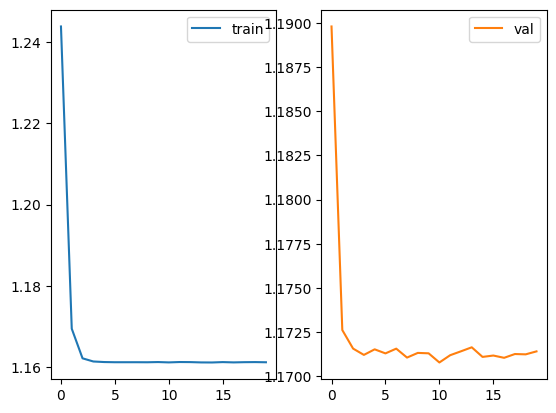

In [60]:
pd.DataFrame(losses).astype(float).plot(kind='line', subplots=True, layout=(1,2))

array([[<Axes: >, <Axes: >]], dtype=object)

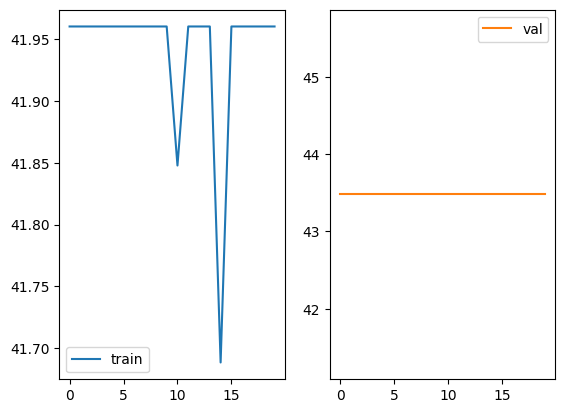

In [61]:
pd.DataFrame(accs).astype(float).plot(kind='line', subplots=True, layout=(1,2))

## 89. Transfer Learning from a Pretrained Language Model

Starting from a Pretrained Language Model (e.g. [BERT](https://github.com/google-research/bert), etc.) model, build a model that categorizes news article headlines into categories.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
from torch.utils.data import Dataset,DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
folder_path = "nlp100-files/chapter9"
data_df = pd.read_csv("nlp100-files/chapter6/news_aggregator/uci-news-aggregator.csv").iloc[:20000]
data_df = data_df[['TITLE','CATEGORY']].rename(columns={"TITLE":"text","CATEGORY":"label"})
train_df, val_df = train_test_split(data_df,test_size=0.2)
val_df, test_df = train_test_split(val_df,test_size=0.5)

/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenization(example):
    return tokenizer(example["text"], padding='max_length', truncation=True, max_length=64)

def convert_label(label):
    map_label = {
        "b":0,
        "t":1,
        "e":2,
        "m":3
    }
    return map_label[label]

train_df["label"] = train_df['label'].apply(convert_label)
test_df["label"] = test_df['label'].apply(convert_label)
val_df["label"] = val_df['label'].apply(convert_label)

train_dataset = Dataset.from_pandas(train_df, split="train")
test_dataset = Dataset.from_pandas(test_df, split="test")
val_dataset = Dataset.from_pandas(val_df, split="val")

train_dataset = train_dataset.map(tokenization, batched=True)
test_dataset = test_dataset.map(tokenization, batched=True)
val_dataset = val_dataset.map(tokenization, batched=True)

/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 2000/2000 [00:00<00:00, 6220.63 examples/s]


In [5]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

# Training arguments
training_args = TrainingArguments(
    output_dir=f'{folder_path}/results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir=f'{folder_path}/logs'
)
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)
# Train the model
trainer.train()

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

{'loss': 0.5248, 'grad_norm': 6.956982135772705, 'learning_rate': 5e-05, 'epoch': 0.5}


                                                   
 33%|███▎      | 1000/3000 [06:51<18:39,  1.79it/s]

{'loss': 0.1831, 'grad_norm': 1.3241374492645264, 'learning_rate': 4e-05, 'epoch': 1.0}


                                                   
 50%|█████     | 1500/3000 [12:08<15:23,  1.62it/s]

{'loss': 0.1084, 'grad_norm': 0.039183031767606735, 'learning_rate': 3e-05, 'epoch': 1.5}


                                                   
 67%|██████▋   | 2000/3000 [17:14<10:00,  1.67it/s]

{'loss': 0.1024, 'grad_norm': 0.1553860902786255, 'learning_rate': 2e-05, 'epoch': 2.0}


                                                   
 83%|████████▎ | 2500/3000 [22:54<05:56,  1.40it/s]

{'loss': 0.0501, 'grad_norm': 0.6307821273803711, 'learning_rate': 1e-05, 'epoch': 2.5}


                                                   
100%|██████████| 3000/3000 [29:30<00:00,  1.01it/s]

{'loss': 0.0532, 'grad_norm': 0.47255659103393555, 'learning_rate': 0.0, 'epoch': 3.0}


                                                   
100%|██████████| 3000/3000 [29:33<00:00,  1.69it/s]

{'train_runtime': 1773.3134, 'train_samples_per_second': 27.068, 'train_steps_per_second': 1.692, 'train_loss': 0.17034553782145181, 'epoch': 3.0}


TrainOutput(global_step=3000, training_loss=0.17034553782145181, metrics={'train_runtime': 1773.3134, 'train_samples_per_second': 27.068, 'train_steps_per_second': 1.692, 'total_flos': 1578694680576000.0, 'train_loss': 0.17034553782145181, 'epoch': 3.0})

In [8]:
pred_res = trainer.predict(test_dataset=test_dataset)

100%|██████████| 250/250 [00:09<00:00, 25.57it/s]


PredictionOutput(predictions=array([[-2.9587271, -1.9047248,  6.627542 , -3.0704558],
       [ 5.2709928,  0.6364453, -2.403507 , -2.8430705],
       [-1.2354836,  5.9975615, -1.674326 , -3.2608259],
       ...,
       [-1.2407491,  5.974041 , -1.6725723, -3.2376077],
       [-2.9421403, -2.095037 ,  6.72739  , -2.9734366],
       [ 6.9017234, -1.8098538, -1.783595 , -2.115764 ]], dtype=float32), label_ids=array([2, 0, 1, ..., 1, 2, 0]), metrics={'test_loss': 0.17022310197353363, 'test_runtime': 9.8232, 'test_samples_per_second': 203.6, 'test_steps_per_second': 25.45})

# Chapter 10: Machine Translation

In this chapter, we train a neural machine translation (NMT) model by using IWSLT'14 English to German translation dataset.
For the actual implementation of an NMT model, use the off-the-shelf toolkits such as [fairseq](https://github.com/pytorch/fairseq), [Hugging Face Transformers](https://github.com/huggingface/transformers) and [OpenNMT-py](https://github.com/OpenNMT/OpenNMT-py).

## 90. Data Preprocessing

Download the dataset and obtain training, validation and test data by running this [script](https://github.com/nlp100/nlp100.github.io/blob/master/tools/prepare_mt_data.sh).


In [1]:
# The website has been restructured and the script can't be used anymore
from datasets import load_dataset,DatasetDict

dataset = load_dataset("ted_talks_iwslt", language_pair=("en", "de"), year="2014")
train_test_dataset = dataset['train'].train_test_split(test_size=0.2)
val_test_dataset = train_test_dataset['test'].train_test_split(test_size=0.5)
dataset = DatasetDict({
    'train': train_test_dataset['train'],
    'val':val_test_dataset['train'],
    'test': val_test_dataset['test']
})
dataset

/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 2377
    })
    val: Dataset({
        features: ['translation'],
        num_rows: 297
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 298
    })
})

In [2]:
dataset['train'][0]

{'translation': {'de': 'Bei TED2010 enthüllt Bill Gates seine Vision der weltweiten Energiezukunft, wobei er die Notwendigkeit von "Wundern" beschreibt, welche eine planetare Katastrophe abwenden können und erklärt warum er einen nie dagewesenen neuen Nukleareaktortypen unterstützt. Das notwendige Ziel? Kein CO2-Ausstoß, weltweit, im Jahre 2050.',
  'en': 'At TED2010, Bill Gates unveils his vision for the world\'s energy future, describing the need for "miracles" to avoid planetary catastrophe and explaining why he\'s backing a dramatically different type of nuclear reactor. The necessary goal? Zero carbon emissions globally by 2050.'}}

## 91. Training the machine translation model

Use the dataset from the problem 90 and train the machine translation model.
The choice of the model architecture is arbitrary (e.g., LSTM-based model, Transformer-based model).


In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-de")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-de")

/home/rizstwn/Desktop/llm-learning/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
def tokenization(text):
    de_text = text['translation']['de']
    en_text = text['translation']['en']
    return tokenizer(en_text, text_target=de_text, padding='max_length', truncation=True, max_length=128)

dataset = dataset.map(tokenization)

Map: 100%|██████████| 298/298 [00:00<00:00, 2731.54 examples/s]


In [5]:
# Training arguments
folder_path = "nlp100-files/chapter10"
training_args = TrainingArguments(
    output_dir=f'{folder_path}/results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir=f'{folder_path}/logs'
)
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['val']
)
# Train the model
trainer.train()

100%|██████████| 447/447 [05:10<00:00,  1.27it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[58100]], 'forced_eos_token_id': 0}
100%|██████████| 447/447 [05:12<00:00,  1.43it/s]

{'train_runtime': 312.8817, 'train_samples_per_second': 22.791, 'train_steps_per_second': 1.429, 'train_loss': 0.8595177567245176, 'epoch': 3.0}


TrainOutput(global_step=447, training_loss=0.8595177567245176, metrics={'train_runtime': 312.8817, 'train_samples_per_second': 22.791, 'train_steps_per_second': 1.429, 'total_flos': 241729240301568.0, 'train_loss': 0.8595177567245176, 'epoch': 3.0})

## 92. Translating a text

Use the trained model from the problem 91 and implement the program that translates a given English sentence to a German sentence.


In [6]:
from transformers import TranslationPipeline

translation_pipe = TranslationPipeline(model=model, tokenizer=tokenizer, task='translation')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [7]:
translation_pipe(dataset['test'][0]['translation']['en'])

[{'translation_text': 'Shimon Steinberg betrachtet den Unterschied zwischen Schädlingen und Fehlern -- und plädiert dafür, gute Bugs zu nutzen, um Fehler zu bekämpfen und Chemikalien zu vermeiden, die auf der Suche nach perfekten Produkten sind. (Gefilmt bei TEDxTelAviv.)'}]

## 93. BLEU score

Use the trained model from the problem 91 and compute the BLEU score on the test set.


In [8]:
def extract_text(data):
    en_text = data['translation']['en']
    de_text = data['translation']['de']
    return {'en_text':en_text, 'de_text':de_text}
dataset['test'] = dataset['test'].map(extract_text)

Map: 100%|██████████| 298/298 [00:00<00:00, 10777.07 examples/s]


In [9]:
dataset['test'][0]

{'translation': {'de': 'Bei TEDxTelAviv betrachtet Shimon Steinberg den Unterschied zwischen Schädlingen und anderen Insekten — und plädiert dafür, mit guten Käfern böse Käfer zu bekämpfen, anstatt mit Chemiekalien nach perfektem Obst und Gemüse zu streben.',
  'en': 'Shimon Steinberg looks at the difference between pests and bugs -- and makes the case for using good bugs to fight bad bugs, avoiding chemicals in our quest for perfect produce. <em>(Filmed at <a href=http://www.ted.com/tedx/events/1>TEDxTelAviv</a>.)</em>'},
 'input_ids': [6161,
  2155,
  3545,
  1298,
  5074,
  67,
  4,
  4873,
  257,
  33387,
  6,
  8,
  19113,
  6,
  4557,
  8,
  1547,
  4,
  527,
  23,
  792,
  402,
  19113,
  6,
  12,
  3449,
  3098,
  19113,
  6,
  2,
  24788,
  14134,
  5,
  125,
  31495,
  23,
  2114,
  4098,
  3,
  3480,
  418,
  19732,
  475,
  18350,
  108,
  67,
  3480,
  111,
  1261,
  135,
  351,
  5864,
  21764,
  6676,
  11568,
  3,
  2910,
  3,
  382,
  75,
  2910,
  403,
  75,
  22755,


In [10]:
from evaluate import TranslationEvaluator

bleu_metrics = TranslationEvaluator()
bleu_metrics.compute(model_or_pipeline=translation_pipe, data=dataset['test'], 
                    metric='bleu', input_column='en_text', label_column='de_text')

{'bleu': 0.31570401812150134,
 'precisions': [0.6202442461249413,
  0.37843757605256756,
  0.25126262626262624,
  0.1735764891104697],
 'brevity_penalty': 0.992512903614078,
 'length_ratio': 0.9925407925407925,
 'translation_length': 8516,
 'reference_length': 8580,
 'total_time_in_seconds': 87.24805535200039,
 'samples_per_second': 3.4155489059065607,
 'latency_in_seconds': 0.2927787092349007}

In [11]:
import evaluate

# evaluate.list_evaluation_modules()
bleu = evaluate.load("bleu")
pred_result = translation_pipe(dataset['test']['en_text'])
pred_result = [x['translation_text'] for x in pred_result]

In [12]:
bleu.compute(predictions=pred_result, references=dataset['test']['de_text'])

{'bleu': 0.31603887083837406,
 'precisions': [0.6203095684803002,
  0.3778857837181045,
  0.25163893091275846,
  0.17330364160335343],
 'brevity_penalty': 0.9939209914220377,
 'length_ratio': 0.9939393939393939,
 'translation_length': 8528,
 'reference_length': 8580}

## 94. Beam search

Use the beam search when translating a given sentence with the model from the problem 91.
Change the beam width from 1 to 100.
Then, plot the change in BLEU score on the graph.


In [18]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
bleu_res = []
for i in range(1,101):
    test_token = tokenizer(dataset['test'][0]['en_text'], return_tensors='pt', padding='max_length', truncation=True, max_length=128).to(device)
    test_label = dataset['test'][0]['de_text']
    beam_output = model.generate(
        **test_token,
        num_beams=i,
        num_return_sequences=1
    )
    pred = tokenizer.decode(beam_output[0], skip_special_tokens=True)
    # print(pred,"\n",test_label)
    score = bleu.compute(predictions=[pred], references=[test_label])
    bleu_res.append(score['bleu'])
    torch.cuda.empty_cache()

<Axes: >

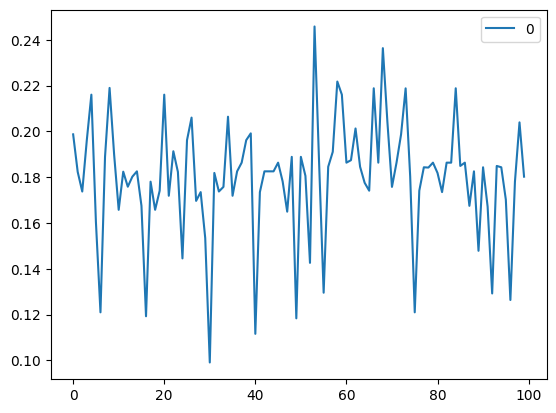

In [21]:
import pandas as pd

pd.DataFrame(bleu_res).plot(kind='line')

## 95. Subword

Use the subword-based segmentation instead of the word-based segmentation.
Repeat the problem 91-94 with the new segmentation.

In [22]:
subword_tokenizer = AutoTokenizer.from_pretrained()

MarianConfig {
  "_name_or_path": "Helsinki-NLP/opus-mt-en-de",
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "swish",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "MarianMTModel"
  ],
  "attention_dropout": 0.0,
  "bad_words_ids": [
    [
      58100
    ]
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 58100,
  "decoder_vocab_size": 58101,
  "dropout": 0.1,
  "encoder_attention_heads": 8,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 0,
  "forced_eos_token_id": 0,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    

## 96. Plotting the learning curve

Use tools like [TensorBoard](https://www.tensorflow.org/tensorboard) and visualize how the training of the machine translation model proceeds.
Specifically, visualize the metrics such as the loss and the BLEU score on the training data, and the loss and the BLEU score on the validation data.


## 97. Hyper-parameter search

Change the architecture and/or hyper-parameter of the machine translation model and search for the model that achieves the highest performance on the validation data.

## 98. Domain Adaptation

Evaluate the machine translation model on newstest2014 dataset.
To do this, use [sacreBLEU](https://github.com/mjpost/sacreBLEU) toolkit.
Then, use [News Commentary](http://data.statmt.org/news-commentary/v15/training/news-commentary-v15.de-en.tsv.gz) dataset and improve the performance of the model.

## 99. Translation Server

Build a demo system, in which the user can translate arbitrary text on the Web browser.